<a href="https://colab.research.google.com/github/ds-leehanjin/dsc-capstone-project/blob/master/index_OSEMN_715.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OVERVIEW OF OSEMiN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/OSEMN.png' width=800>

<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html"> 
    </a></center>


> <font size=2em>The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 
</font>


### OSEMN DETAILS

**OBTAIN**

- This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**SCRUB**

- During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

- Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**EXPLORE**

- This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

- At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**MODEL**

- This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**iNTERPRET**

- During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  





## PROCESS CHECKLIST


> Keep in mind that it is normal to jump between the OSEMN phases and some of them will blend together, like SCRUB and EXPLORE.

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>


2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
       
6. **Interpret final model and draw >=3 conclusions and recommendations from dataset**

<div style="display:block;border-bottom:solid red 3px;padding:1.4em;color:red;font-size:30pt;display:inline-block;line-height:1.5em;">
DELETE THIS CELL AND EVERYTHING ABOVE FROM YOUR FINAL NOTEBOOK
</div>

# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time:
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>
 
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***



# OBTAIN

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***


In [2]:
# Import all packages to be used
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import string

import nltk
from nltk import FreqDist, word_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud
from PIL import Image

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix, roc_curve

%matplotlib inline

In [3]:
# Set theme and style for plots.
sns.set_theme('talk')
sns.set_style('darkgrid')

In [4]:
# Set random seed
np.random.seed(27)

In [5]:
# Set no limit to column width to view full review text
pd.options.display.max_colwidth = None

In [6]:
# Create list of all csv files
path = r'/content/drive/MyDrive/data'
all_files = glob.glob(os.path.join(path, "*.csv"))
all_files

['/content/drive/MyDrive/data/app-name-id.csv',
 '/content/drive/MyDrive/data/app_info.csv',
 '/content/drive/MyDrive/data/headspace-meditation-sleep.csv',
 '/content/drive/MyDrive/data/calm.csv',
 '/content/drive/MyDrive/data/stoic.csv',
 '/content/drive/MyDrive/data/happify-for-stress-worry.csv',
 '/content/drive/MyDrive/data/shine-calm-anxiety-stress.csv',
 '/content/drive/MyDrive/data/mindshift-cbt-anxiety-relief.csv',
 '/content/drive/MyDrive/data/moodtools-depression-aid.csv',
 '/content/drive/MyDrive/data/insight-timer-meditation-app.csv',
 '/content/drive/MyDrive/data/moodfit.csv',
 '/content/drive/MyDrive/data/talkspace-therapy-counseling.csv',
 '/content/drive/MyDrive/data/moodmission.csv',
 '/content/drive/MyDrive/data/sanvello-anxiety-depression.csv',
 '/content/drive/MyDrive/data/minddoc-your-companion.csv',
 '/content/drive/MyDrive/data/smiling-mind.csv',
 '/content/drive/MyDrive/data/cbt-i-coach.csv',
 '/content/drive/MyDrive/data/youper-self-guided-therapy.csv',
 '/cont

In [7]:
# Remove app-name-id.csv and app_info.csv because they do not hold review
# text data
all_files.pop(0)
all_files.pop(0)
all_files

['/content/drive/MyDrive/data/headspace-meditation-sleep.csv',
 '/content/drive/MyDrive/data/calm.csv',
 '/content/drive/MyDrive/data/stoic.csv',
 '/content/drive/MyDrive/data/happify-for-stress-worry.csv',
 '/content/drive/MyDrive/data/shine-calm-anxiety-stress.csv',
 '/content/drive/MyDrive/data/mindshift-cbt-anxiety-relief.csv',
 '/content/drive/MyDrive/data/moodtools-depression-aid.csv',
 '/content/drive/MyDrive/data/insight-timer-meditation-app.csv',
 '/content/drive/MyDrive/data/moodfit.csv',
 '/content/drive/MyDrive/data/talkspace-therapy-counseling.csv',
 '/content/drive/MyDrive/data/moodmission.csv',
 '/content/drive/MyDrive/data/sanvello-anxiety-depression.csv',
 '/content/drive/MyDrive/data/minddoc-your-companion.csv',
 '/content/drive/MyDrive/data/smiling-mind.csv',
 '/content/drive/MyDrive/data/cbt-i-coach.csv',
 '/content/drive/MyDrive/data/youper-self-guided-therapy.csv',
 '/content/drive/MyDrive/data/innerhour-self-care-therapy.csv',
 '/content/drive/MyDrive/data/breath

In [8]:
# Create a list of all loaded review text dataframes
df_list = []

for filename in all_files:
    temp_df = pd.read_csv(filename)
    df_list.append(temp_df)

In [9]:
# Concatenate all tables into a single dataframe
df = pd.concat(df_list, axis=0, ignore_index=True)
df

,title,isEdited,userName,date,review,rating,app_name,app_id,developerResponse
0,This is the BEST app by far for mindfulness,False,Crazy Yorkie Lady,2021-02-22 18:13:54,"It’s almost embarrassing to say this, but I have been a “meditator” for about 30 years and I have to say that I never really got very much out of doing it. I tried so hard, but I’m finding out I never truly understood that “trying” to be a good meditator or mindful person, was missing what doing this was about. What I’m learning through this app is that “mindfulness” is about me - understanding myself first, and it’s a lot about acceptance. So with that understanding and acceptance I can begin to see “things” so much more clearly and why previous ways of thinking, particularly about myself, were holding me back from living my life and loving myself. And I’m finding that the more I practice self acceptance, the fears about living fully and going after what I want out of my life, are disappearing. \nThe previous version of myself is rapidly becoming someone I only used to know, and this new ME is much more in line with who I’d always wanted to be. I’m able to try and do so much more, all while in the comfort that I am lovable, even if I fail at something. I simply dust myself off and try some more.\nThis app has completely changed me and the way I’m able to appreciate all the good that’s in my life. And I’m worthy of going after the things I want for my life, while freeing me up to share my gifts with others and society in general.\nIf this is where you find your life stalling out, this app will bring you back to yourself.",5,headspace-meditation-sleep,493145008,NaN
1,Facing down the rabbit hole,False,KLC-MHFL,2021-02-12 12:42:11,"I discovered Headspace on Netflix. My life is a series of invitations to succumb to fear. My husband is a practicing psychologist who is on peritoneal dialysis for 10 hours every night and works remotely with patients for about 10 hours every day without complaint. We have been waiting for a kidney for two years. I am optimistic by nature but even if this was the only focus for concern it would be a lot. Unhelpfully, the list goes on with equivalent issues. I can’t work; I need to be on call because I am the go-to for support. I occupy my mind and time writing a book and renovating every room of our home one at a time amidst being available for nine blended (mostly grown) children and 5 grandkids, many of whom have special needs. I am busy but isolated like so many due to covid-19. Trying the Headspace series felt like meeting air; filling the natural and effortless need to breathe. It has provided me with a new lens through which to focus on challenges and see potential. I incorporate it into my waking routine at dawn and it positions me for whatever happens throughout the day, and differentiates a space that is my own. I turn 61 this month and for maybe the first time in a while, life feels lighter and brighter. It’s not about what you fear or can’t control or even the fact of fear. It’s about the lens through which you interpret your fears or challenges and making them your strengths and allies. Thank you Andy :-)",5,headspace-meditation-sleep,493145008,NaN
2,A Bright Spot in a Dark World,False,Ashabashley,2021-02-11 06:22:38,"You won’t regret buying a Headspace subscription. I often joke with people that Headspace is the one thing I would want to take with me to a desert island. If I were to cancel all of my subscriptions today, Headspace is the one exception I would make. I’m a high school English teacher, and our administration put together a month-long mindfulness education program for our students shortly after I subscribed. I had already raved to many of them about the app and the benefits of taking a couple of minutes out of their day to sit and be present. Lo and behold, Andy pops up on the next slide as our Ted Talk speaker of the day! On a more serious note, I suffer from debilitating chronic pain. I’m currently on long-ter

# SCRUB

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [10]:
# Check for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44722 entries, 0 to 44721
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              44722 non-null  object
 1   isEdited           44722 non-null  bool  
 2   userName           44722 non-null  object
 3   date               44722 non-null  object
 4   review             44721 non-null  object
 5   rating             44722 non-null  int64 
 6   app_name           44722 non-null  object
 7   app_id             44722 non-null  int64 
 8   developerResponse  4765 non-null   object
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


In [11]:
# Check null values in review column
df[df['review'].isna()]

,title,isEdited,userName,date,review,rating,app_name,app_id,developerResponse
17939,Trying to remove my review after request for refund was accepted,True,Xwave500,2021-01-23 13:54:34,NaN,4,talkspace-therapy-counseling,661829386,"{'id': 20485547, 'body': 'Hi there, we are so sorry to hear of your less than optimal experience. Someone from our team would love to look into what happened and do what we can to make this right by you. Please send us an email at Feedback@Talkspace.com, we look forward to hearing from you. ', 'modified': '2021-01-18T20:54:59Z'}"


In [12]:
# Remove row with null value for review
df = df[df['review'].isna()==False]

In [13]:
# Check for duplicated rows
df[df.duplicated(keep=False)]

,title,isEdited,userName,date,review,rating,app_name,app_id,developerResponse
808,WHY IS EVERYTHING LOCKED,False,Rock Lee Lee Rock,2020-12-15 05:26:40,"I love this app, and it’s overall great. I used to have little to no complaints, but now it’s insane. I get that you need money for your business, but everything is locked. It’s expensive and very sad. I used to listen to beachcomber every night until everything was locked and you needed to pay for it. It’s fine to have some payment things, but at least leave 1/3 of them free. I don’t want to pay a lot of money just to listen to music or a sleep cast.",2,headspace-meditation-sleep,493145008,NaN
3935,WHY IS EVERYTHING LOCKED,False,Rock Lee Lee Rock,2020-12-15 05:26:40,"I love this app, and it’s overall great. I used to have little to no complaints, but now it’s insane. I get that you need money for your business, but everything is locked. It’s expensive and very sad. I used to listen to beachcomber every night until everything was locked and you needed to pay for it. It’s fine to have some payment things, but at least leave 1/3 of them free. I don’t want to pay a lot of money just to listen to music or a sleep cast.",2,headspace-meditation-sleep,493145008,NaN
8564,Premium,False,LAK 😍,2020-06-08 03:53:35,"I love the app, there just isn’t much you can do without paying 60 dollars.",4,calm,571800810,NaN
8565,Could do hardly anything,False,pigletgirl2011,2020-06-20 05:50:08,I would like it if you could unlock more things on the app because I got this to help myself sleep better but I can’t sleep any better.,2,calm,571800810,NaN
8566,No very good.,False,Bookjhui,2020-06-10 00:10:12,"In my opinion you can get most of this online for basically free. I should have just tried it for a month instead of wasted the $70 for the year. My fault, oh well lesson learned. Wish I could get my money back. !",1,calm,571800810,NaN
8568,Could do hardly anything,False,pigletgirl2011,2020-06-20 05:50:08,I would like it if you could unlock more things on the app because I got this to help myself sleep better but I can’t sleep any better.,2,calm,571800810,NaN
8569,No very good.,False,Bookjhui,2020-06-10 00:10:12,"In my opinion you can get most of this online for basically free. I should have just tried it for a month instead of wasted the $70 for the year. My fault, oh well lesson learned. Wish I could get my money back. !",1,calm,571800810,NaN
8570,Premium,False,LAK 😍,2020-06-08 03:53:35,"I love the app, there just isn’t much you can do without paying 60 dollars.",4,calm,571800810,NaN
9182,Beginning,False,Weather ghost,2021-01-05 00:29:35,Just started but like it so far,4,calm,571800810,NaN
9380,In Spanish please the voice of her,False,nievedefebrero,2020-12-12 13:16:17,"What great if you put sonidos , música y cuenta cuentos en Español . Yo soy Maestra , love reed and I counted historíes to my Spanish er kids in Uruguay. Please I am very anxious in this days and need it . 🙏",4,calm,571800810,NaN


In [14]:
#Remove duplicated rows
df = df.drop_duplicates()

In [15]:
# Check for multiple reviews for same app from same user
df[df.duplicated(['userName', 'app_name'], keep=False)]

,title,isEdited,userName,date,review,rating,app_name,app_id,developerResponse
18882,"Worth it, but with a flaw for me",False,Hobbit of the Shire,2021-01-24 18:03:56,"I found MindDoc (previously Moodpath) when I was struggling with my mental health and wanted to track my emotions and journal my thoughts throughout the day. This app is perfect for that. \n\nCurrently, the free version asks you a few questions 3x a day, allows you to record your emotional state and any thoughts, and gives you a report every two weeks. \n\nWhat appeals to me is the streamlined nature of the app. It has additional content for those interested, but for me, the free version fufills all that I need it to.\n\nThe only flaw is that I had data for about 6 months before they changed the name and structure of the app, resulting in the loss of all my journal enteries. Unfortunately, they were unable to retrieve the data due to the way the app was structured before. Other than this flaw, I really enjoy this app and would recommend it to others.",4,minddoc-your-companion,1052216403,NaN
18911,"Love app, but lost data!",False,Hobbit of the Shire,2021-01-19 21:15:26,"I’ve really enjoyed using this app. It’s very streamlined, just a mood tracker and journal. Perfect!\n\nUnfortunately, when Moodpath switched to MindDoc, I got logged out (forgot the password) and lost my data. It won’t send me an email to reset it. I’m seeing other reviewers experiencing the same problem. I’ve already contacted the support email with my issue and still waiting on a response. \n\nI’ll update this review to five stars when it gets fixed because it’s worked great up till this point. Thank you!",2,minddoc-your-companion,1052216403,"{'id': 20551815, 'body': 'Hello, thank you for reaching out. We are very sorry you lost your data! We will contact you via mail as soon as we manage to bring it back. Our team is working hard to solve this inconvenient problem. Best wishes and thank you for your patience, your MindDoc team', 'modified': '2021-01-21T11:43:06Z'}"


In [16]:
# Combining title and review column to get full review text
df['combined_text'] = df['title'] + ". " + df['review']
df

,title,isEdited,userName,date,review,rating,app_name,app_id,developerResponse,combined_text
0,This is the BEST app by far for mindfulness,False,Crazy Yorkie Lady,2021-02-22 18:13:54,"It’s almost embarrassing to say this, but I have been a “meditator” for about 30 years and I have to say that I never really got very much out of doing it. I tried so hard, but I’m finding out I never truly understood that “trying” to be a good meditator or mindful person, was missing what doing this was about. What I’m learning through this app is that “mindfulness” is about me - understanding myself first, and it’s a lot about acceptance. So with that understanding and acceptance I can begin to see “things” so much more clearly and why previous ways of thinking, particularly about myself, were holding me back from living my life and loving myself. And I’m finding that the more I practice self acceptance, the fears about living fully and going after what I want out of my life, are disappearing. \nThe previous version of myself is rapidly becoming someone I only used to know, and this new ME is much more in line with who I’d always wanted to be. I’m able to try and do so much more, all while in the comfort that I am lovable, even if I fail at something. I simply dust myself off and try some more.\nThis app has completely changed me and the way I’m able to appreciate all the good that’s in my life. And I’m worthy of going after the things I want for my life, while freeing me up to share my gifts with others and society in general.\nIf this is where you find your life stalling out, this app will bring you back to yourself.",5,headspace-meditation-sleep,493145008,NaN,"This is the BEST app by far for mindfulness. It’s almost embarrassing to say this, but I have been a “meditator” for about 30 years and I have to say that I never really got very much out of doing it. I tried so hard, but I’m finding out I never truly understood that “trying” to be a good meditator or mindful person, was missing what doing this was about. What I’m learning through this app is that “mindfulness” is about me - understanding myself first, and it’s a lot about acceptance. So with that understanding and acceptance I can begin to see “things” so much more clearly and why previous ways of thinking, particularly about myself, were holding me back from living my life and loving myself. And I’m finding that the more I practice self acceptance, the fears about living fully and going after what I want out of my life, are disappearing. \nThe previous version of myself is rapidly becoming someone I only used to know, and this new ME is much more in line with who I’d always wanted to be. I’m able to try and do so much more, all while in the comfort that I am lovable, even if I fail at something. I simply dust myself off and try some more.\nThis app has completely changed me and the way I’m able to appreciate all the good that’s in my life. And I’m worthy of going after the things I want for my life, while freeing me up to share my gifts with others and society in general.\nIf this is where you find your life stalling out, this app will bring you back to yourself."
1,Facing down the rabbit hole,False,KLC-MHFL,2021-02-12 12:42:11,"I discovered Headspace on Netflix. My life is a series of invitations to succumb to fear. My husband is a practicing psychologist who is on peritoneal dialysis for 10 hours every night and works remotely with patients for about 10 hours every day without complaint. We have been waiting for a kidney for two years. I am optimistic by nature but even if this was the only focus for concern it would be a lot. Unhelpfully, the list goes on with equivalent issues. I can’t work; I need to be on call because I am the go-to for support. I occupy my mind and time writing a book and renovating every room of our home one at a time amidst being available for nine blended (mostly grown) children and 5 grandkids, many of whom have special needs. I am busy but isolated like so

In [17]:
## Create a variable "corpus" containing all text
corpus = df['combined_text'].to_list()

## Preview first 2 reviews
corpus[:2]

['This is the BEST app by far for mindfulness. It’s almost embarrassing to say this, but I have been a “meditator” for about 30 years and I have to say that I never really got very much out of doing it.  I tried so hard, but I’m finding out I never truly understood that “trying” to be a good meditator or mindful person, was missing what doing this was about.  What I’m learning through this app is that “mindfulness” is about me - understanding myself first, and it’s a lot about acceptance.  So with that understanding and acceptance I can begin to see “things” so much more clearly and why previous ways of thinking, particularly about myself, were holding me back from living my life and loving myself.  And I’m finding that the more I practice self acceptance, the fears about living fully and going after what I want out of my life, are disappearing.  \nThe previous version of myself is rapidly becoming someone I only used to know, and this new ME is much more in line with who I’d always wa

In [18]:
df['combined_text'] = df['combined_text'].replace(r'\\', '', regex=True)
df['combined_text']

0        This is the BEST app by far for mindfulness. It’s almost embarrassing to say this, but I have been a “meditator” for about 30 years and I have to say that I never really got very much out of doing it.  I tried so hard, but I’m finding out I never truly understood that “trying” to be a good meditator or mindful person, was missing what doing this was about.  What I’m learning through this app is that “mindfulness” is about me - understanding myself first, and it’s a lot about acceptance.  So with that understanding and acceptance I can begin to see “things” so much more clearly and why previous ways of thinking, particularly about myself, were holding me back from living my life and loving myself.  And I’m finding that the more I practice self acceptance, the fears about living fully and going after what I want out of my life, are disappearing.  \nThe previous version of myself is rapidly becoming someone I only used to know, and this new ME is much more in line with who I’d al

In [19]:
corpus[2200:2202]

['Amazing 😻. So I got this app to help me sleep but it helps me with axitey and stress and sleep definitely get this app if you have any problems with stress :)',
 'I was embarrassed. To say the phrase “meditation app”, but this is brilliant. I’m so grateful to Andy and the crew for creating this accessible, affordable, effective means to start or restart a meditation practice. Thanks, all.']

In [20]:
df['combined_text'] = df['combined_text'].replace(r'\n',' ', regex=True) 
## Create a variable "corpus" containing all text
corpus = df['combined_text'].to_list()
corpus[2200:2202]

['Amazing 😻. So I got this app to help me sleep but it helps me with axitey and stress and sleep definitely get this app if you have any problems with stress :)',
 'I was embarrassed. To say the phrase “meditation app”, but this is brilliant. I’m so grateful to Andy and the crew for creating this accessible, affordable, effective means to start or restart a meditation practice. Thanks, all.']

# EXPLORE

In [21]:
# Check distribution of reviews for each app
df['app_name'].value_counts(normalize=True)

reflectly-journal-ai-diary        0.325809
calm                              0.204193
fabulous-daily-routine-planner    0.138015
headspace-meditation-sleep        0.088035
insight-timer-meditation-app      0.067609
youper-self-guided-therapy        0.037407
talkspace-therapy-counseling      0.020694
ten-percent-happier-meditation    0.020381
slumber-fall-asleep-insomnia      0.015616
sanvello-anxiety-depression       0.012797
stoic                             0.012350
breethe-meditation-sleep          0.012215
shine-calm-anxiety-stress         0.010135
minddoc-your-companion            0.009464
betterme-calm-sleep-meditate      0.004474
meditopia-meditation-breathe      0.003982
relax-meditation-guided-mind      0.003378
rootd-panic-attack-relief         0.003311
moodfit                           0.001924
pzizz-sleep-nap-focus             0.001790
mindshift-cbt-anxiety-relief      0.001611
smiling-mind                      0.001454
happify-for-stress-worry          0.000828
mindfulness

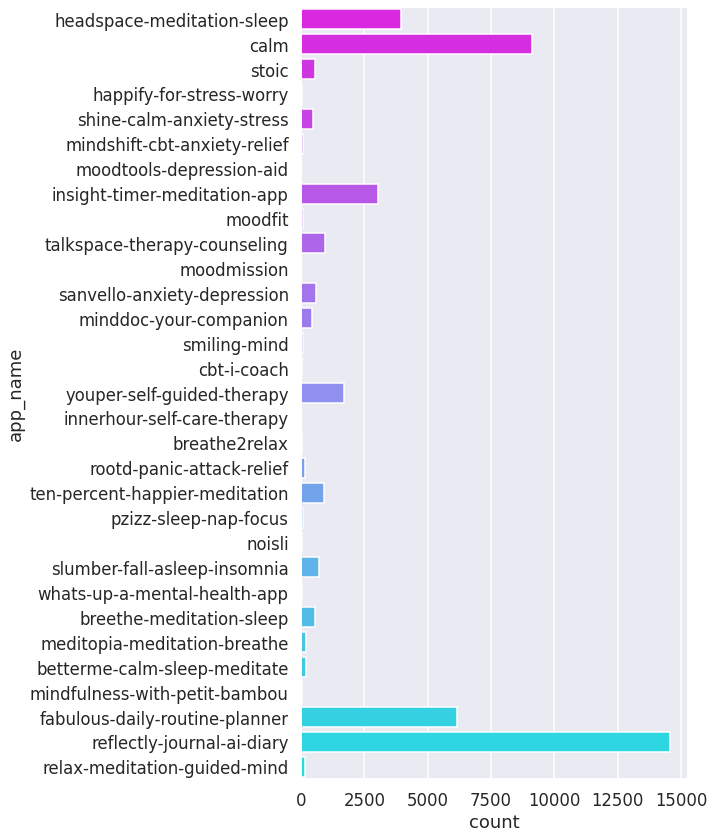

In [22]:
# Plot distribution of review count by app name
fig, ax = plt.subplots(figsize=(10,12))

sns.countplot(data=df, y='app_name', palette='cool_r', ax=ax, orient='h')
plt.tight_layout()

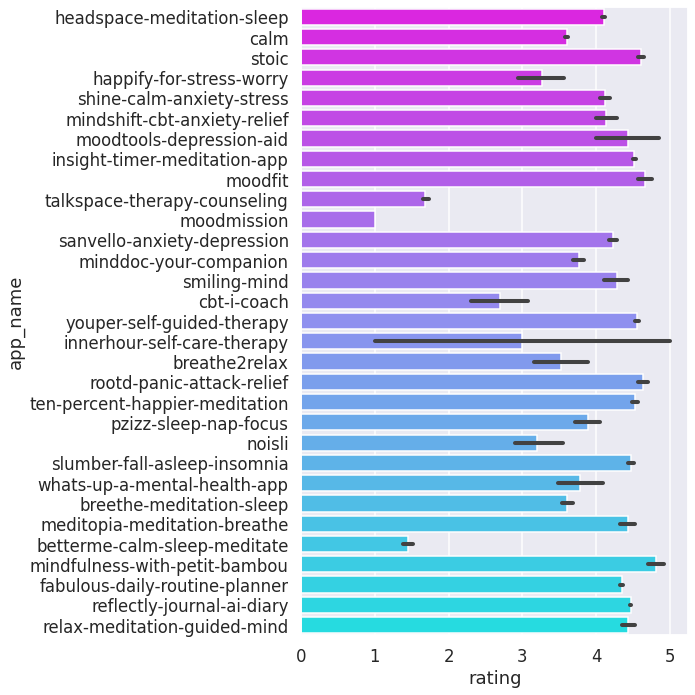

In [23]:
# Plot average rating by app name
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=df, x='rating', y='app_name', palette='cool_r', ax=ax, ci=68, orient='h')
plt.tight_layout()

In [24]:
# Check value counts for isEdited column
df['isEdited'].value_counts()

False    44402
True       296
Name: isEdited, dtype: int64

In [25]:
# Check value counts for developerResponse column
(df['developerResponse'].isna()).value_counts()

True     39934
False     4764
Name: developerResponse, dtype: int64

In [26]:
# Preview sample developer responses
df[df['developerResponse'].isna()==False]

,title,isEdited,userName,date,review,rating,app_name,app_id,developerResponse,combined_text
29,Loved at first,False,nizismom,2020-04-28 00:59:49,I loved it the first day I tried it in February 2020 and purchased a year long subscription. I use it several times a day and my four year old and I fall asleep to the sleep casts every night. I cope with severe anxiety on a daily basis and during the pandemic this has been extremely challenging. Three nights ago I really needed my favorite windown and sleepcast and they are all locked and it’s asking me to start a free trial if I want to use them. I have followed all the advice on the help section to try to restore my purchase but even under my subscriptions it shows I am a subscriber and it doesn’t expire until feb 2021. I’ve emailed headspace and have heard nothing back and also tried the chat and it just feeds me the same unhelpful help and then prompts me\nto email them again. If I get this resolved I’ll update and add more stars but I’m extremely disappointed right now and not happy with the lack of customer service. Maybe I will switch to Calm,5,headspace-meditation-sleep,493145008,"{'id': 14974073, 'body': 'We are sorry for the trouble with accessing your account! Could you please provide us with your email reference number so we can follow up with you?', 'modified': '2020-04-28T18:57:36Z'}",Loved at first. I loved it the first day I tried it in February 2020 and purchased a year long subscription. I use it several times a day and my four year old and I fall asleep to the sleep casts every night. I cope with severe anxiety on a daily basis and during the pandemic this has been extremely challenging. Three nights ago I really needed my favorite windown and sleepcast and they are all locked and it’s asking me to start a free trial if I want to use them. I have followed all the advice on the help section to try to restore my purchase but even under my subscriptions it shows I am a subscriber and it doesn’t expire until feb 2021. I’ve emailed headspace and have heard nothing back and also tried the chat and it just feeds me the same unhelpful help and then prompts me to email them again. If I get this resolved I’ll update and add more stars but I’m extremely disappointed right now and not happy with the lack of customer service. Maybe I will switch to Calm
53,Amazing but missing something,True,jellyfishqween,2021-02-24 21:41:55,"This app is a game changer and is leaps and bounds above anything this accessible to the public that I have seen before. They fixed many bugs I once had issues with. The sleep casts no longer have issues buffering\n\nOne key difficulty I have with the app is that it leaves a perspective of naïveté. This app will teach you about tools for everything from meditation to career and money management, but it will not teach you nor properly prepare you for genuine malevolence that likely inevitably arises. \n\nI would caution people to not let mindfulness techniques promoting optimistic mentalities obscure an important skill for developing real danger. The animations can mislead you into thinking mindfulness and being a healthy human goes hand in hand with being naive. This may be more of a problem for some than others, but I felt it helpful to express anyhow since it’s not discussed.",5,headspace-meditation-sleep,493145008,"{'id': 16546248, 'body': 'So sorry to hear of any issues with the Sleepcasts! Please send our team a note at help@headspace.com so we can look into this for you.', 'modified': '2020-07-11T00:04:21Z'}","Amazing but missing something. This app is a game changer and is leaps and bounds above anything this accessible to the public that I have seen before. They fixed many bugs I once had issues with. The sleep casts no longer have issues buffering One key difficulty I have with the app is that it leaves a perspective of naïveté. This app will teach you about tools for everything from meditation to career and money management, but it will not teach

In [27]:
# Check distribution of ratings across all apps
df['rating'].value_counts()

5    30534
1     5898
4     4058
3     2379
2     1829
Name: rating, dtype: int64

In [28]:
# Check distribution of ratings across all apps in percentages
df['rating'].value_counts(normalize=True)

5    0.683118
1    0.131952
4    0.090787
3    0.053224
2    0.040919
Name: rating, dtype: float64

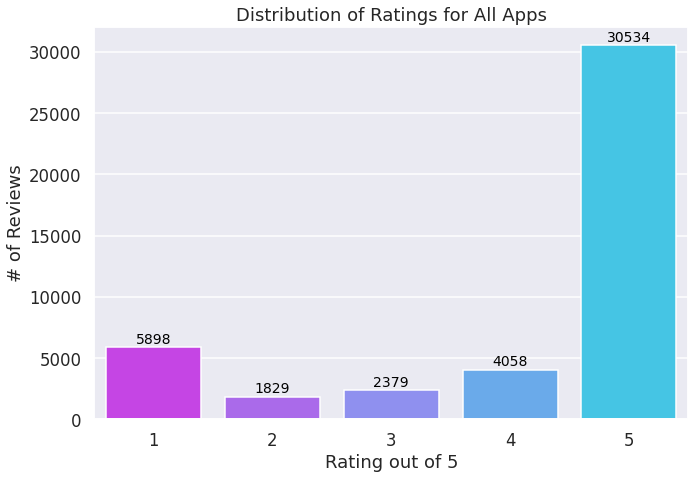

In [29]:
# Plot distribution of ratings across all apps
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='rating', data=df, ax=ax, palette='cool_r')
ax.set_title('Distribution of Ratings for All Apps')
ax.set_ylabel('# of Reviews')
ax.set_xlabel('Rating out of 5')

for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=14, color='black', xytext=(0, 8), \
                textcoords='offset points')
fig.tight_layout();

In [141]:
distribution_df = df[df['app_name'].isin(['headspace-meditation-sleep', 'calm', 
                                       'insight-timer-meditation-app', 
                                       'fabulous-daily-routine-planner', 
                                       'reflectly-journal-ai-diary'])]
distribution_df = distribution_df.groupby('app_name')['rating'].value_counts(normalize=True).to_frame()
distribution_df.columns = ['percentage']
distribution_df.reset_index(inplace=True)
distribution_df

,app_name,rating,percentage
0,calm,5,0.527994
1,calm,1,0.233154
2,calm,4,0.084475
3,calm,3,0.079873
4,calm,2,0.074504
5,fabulous-daily-routine-planner,5,0.717134
6,fabulous-daily-routine-planner,4,0.124980
7,fabulous-daily-routine-planner,1,0.092884
8,fabulous-daily-routine-planner,3,0.036473
9,fabulous-daily-routine-planner,2,0.028530


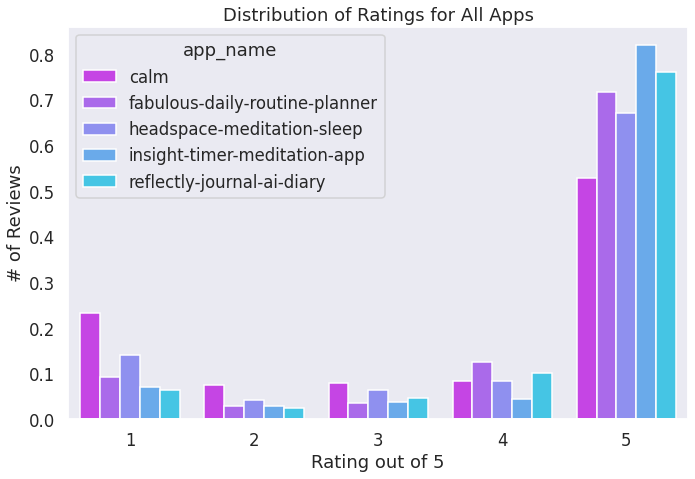

In [145]:
# Plot distribution of ratings across all apps
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='rating', y='percentage', hue='app_name', data=distribution_df, ax=ax, palette='cool_r')
ax.set_title('Distribution of Ratings for All Apps')
ax.set_ylabel('# of Reviews')
ax.set_xlabel('Rating out of 5')


fig.tight_layout();

In [31]:
## Make new multiclass sentiment column based on rating
conditions = [
    df['rating'] >= 4,
    df['rating'] == 3,
    df['rating'] <= 2,
]

values = [2, 1, 0]

df['multi_sent'] = np.select(conditions, values)

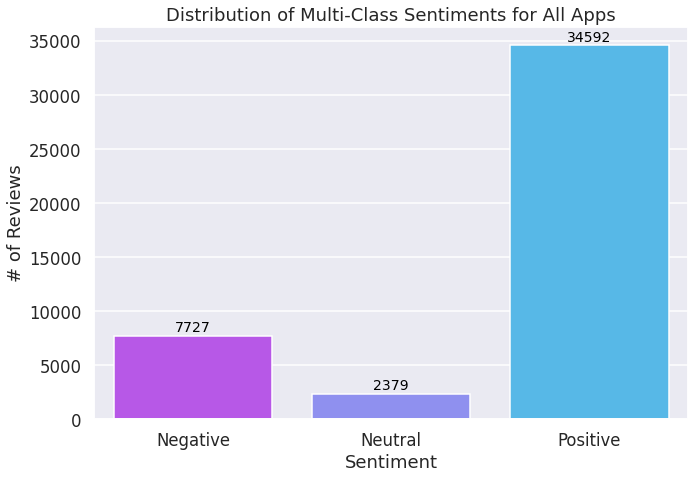

In [32]:
# Plot distribution of multiclass sentiments across all apps
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='multi_sent', data=df, ax=ax, palette='cool_r')
ax.set_title('Distribution of Multi-Class Sentiments for All Apps')
ax.set_ylabel('# of Reviews')
ax.set_xlabel('Sentiment')
ax.set_xticklabels(['Negative','Neutral', 'Positive'])

for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=14, color='black', xytext=(0, 8), \
                textcoords='offset points')
fig.tight_layout();

In [33]:
## Make new binary sentiment column based on ratings 3 and up
conditions = [
    df['rating'] >= 3,
    df['rating'] < 3,
]

values = [1,0]

df['sent_bin_3up'] = np.select(conditions, values)

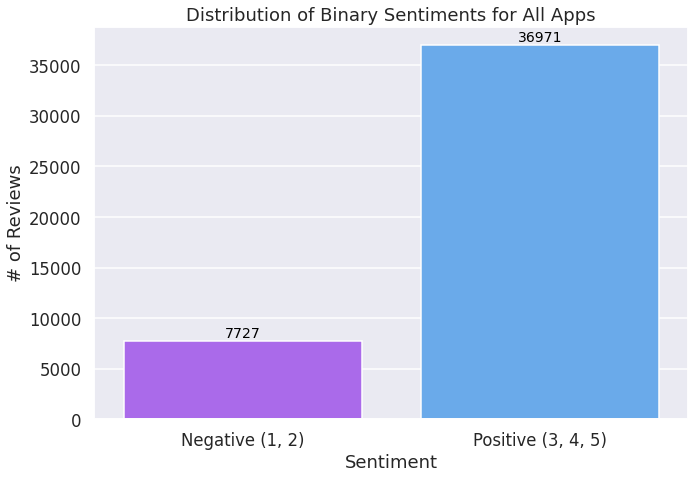

In [34]:
# Plot distribution of binary sentiments across all apps
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='sent_bin_3up', data=df, ax=ax, palette='cool_r')
ax.set_title('Distribution of Binary Sentiments for All Apps')
ax.set_ylabel('# of Reviews')
ax.set_xlabel('Sentiment')
ax.set_xticklabels(['Negative (1, 2)', 'Positive (3, 4, 5)'])

for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=14, color='black', xytext=(0, 8), \
                textcoords='offset points')
fig.tight_layout();

In [35]:
## Make new binary sentiment column based on ratings 4 and up
conditions = [
    df['rating'] >= 4,
    df['rating'] < 4,
]

values = [1,0]

df['sent_bin_4up'] = np.select(conditions, values)

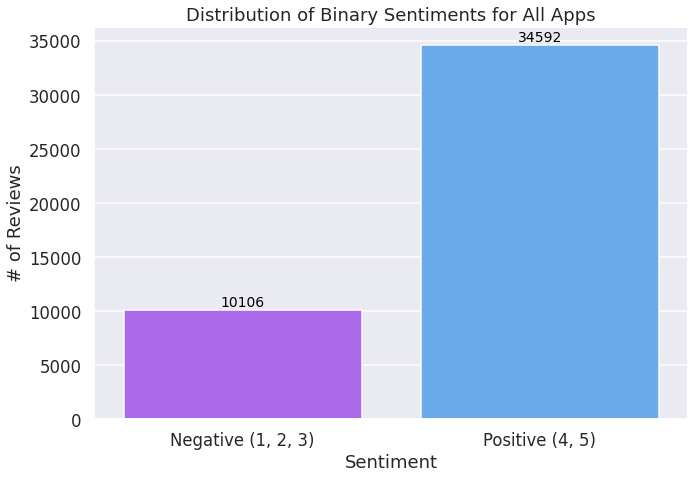

In [36]:
# Plot distribution of binary sentiments across all apps
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='sent_bin_4up', data=df, ax=ax, palette='cool_r')
ax.set_title('Distribution of Binary Sentiments for All Apps')
ax.set_ylabel('# of Reviews')
ax.set_xlabel('Sentiment')
ax.set_xticklabels(['Negative (1, 2, 3)', 'Positive (4, 5)'])

for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=14, color='black', xytext=(0, 8), \
                textcoords='offset points')
fig.tight_layout();

We can see a large class imbalance between Negative and Positive for both splits. However, during the modeling trials, it was found that the 1-3, 4-5 split performed slightly better than the 1-2, 3-5 split on all model types. Therefore, we will proceed with the 1-3, 4-5 split, since the insights we can gain from a more accurate model will be more powerful than from a less accurate one.

In [37]:
# Slice out relevant columns into a new dataframe
clean_df = df[['date', 'userName', 'combined_text', 'rating', 'multi_sent', 
               'sent_bin_3up', 'sent_bin_4up']]
clean_df

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
0,2021-02-22 18:13:54,Crazy Yorkie Lady,"This is the BEST app by far for mindfulness. It’s almost embarrassing to say this, but I have been a “meditator” for about 30 years and I have to say that I never really got very much out of doing it. I tried so hard, but I’m finding out I never truly understood that “trying” to be a good meditator or mindful person, was missing what doing this was about. What I’m learning through this app is that “mindfulness” is about me - understanding myself first, and it’s a lot about acceptance. So with that understanding and acceptance I can begin to see “things” so much more clearly and why previous ways of thinking, particularly about myself, were holding me back from living my life and loving myself. And I’m finding that the more I practice self acceptance, the fears about living fully and going after what I want out of my life, are disappearing. The previous version of myself is rapidly becoming someone I only used to know, and this new ME is much more in line with who I’d always wanted to be. I’m able to try and do so much more, all while in the comfort that I am lovable, even if I fail at something. I simply dust myself off and try some more. This app has completely changed me and the way I’m able to appreciate all the good that’s in my life. And I’m worthy of going after the things I want for my life, while freeing me up to share my gifts with others and society in general. If this is where you find your life stalling out, this app will bring you back to yourself.",5,2,1,1
1,2021-02-12 12:42:11,KLC-MHFL,"Facing down the rabbit hole. I discovered Headspace on Netflix. My life is a series of invitations to succumb to fear. My husband is a practicing psychologist who is on peritoneal dialysis for 10 hours every night and works remotely with patients for about 10 hours every day without complaint. We have been waiting for a kidney for two years. I am optimistic by nature but even if this was the only focus for concern it would be a lot. Unhelpfully, the list goes on with equivalent issues. I can’t work; I need to be on call because I am the go-to for support. I occupy my mind and time writing a book and renovating every room of our home one at a time amidst being available for nine blended (mostly grown) children and 5 grandkids, many of whom have special needs. I am busy but isolated like so many due to covid-19. Trying the Headspace series felt like meeting air; filling the natural and effortless need to breathe. It has provided me with a new lens through which to focus on challenges and see potential. I incorporate it into my waking routine at dawn and it positions me for whatever happens throughout the day, and differentiates a space that is my own. I turn 61 this month and for maybe the first time in a while, life feels lighter and brighter. It’s not about what you fear or can’t control or even the fact of fear. It’s about the lens through which you interpret your fears or challenges and making them your strengths and allies. Thank you Andy :-)",5,2,1,1
2,2021-02-11 06:22:38,Ashabashley,"A Bright Spot in a Dark World. You won’t regret buying a Headspace subscription. I often joke with people that Headspace is the one thing I would want to take with me to a desert island. If I were to cancel all of my subscriptions today, Headspace is the one exception I would make. I’m a high school English teacher, and our administration put together a month-long mindfulness education program for our students shortly after I subscribed. I had already raved to many of them about the app and the benefits of taking a couple of minutes out of their day to sit and be present. Lo and behold, Andy pops up on the next slide as our Ted Talk speaker of the day! On a more serious note, I suffer from debilitating chronic pain. I’m currently on long-term disability and a leave of absence from the classroom. Mindfulness, and the courses on managi

## Tokenization

In [38]:
# Create a single corpus out of all combined text
corpus = clean_df['combined_text'].to_list()

In [39]:
# Convert Corpus to Tokens
tokens = regexp_tokenize(','.join(corpus), r"([a-zA-Z]+(?:’[a-z]+)?)")

In [40]:
# Preview tokens
tokens[:20]

['This',
 'is',
 'the',
 'BEST',
 'app',
 'by',
 'far',
 'for',
 'mindfulness',
 'It’s',
 'almost',
 'embarrassing',
 'to',
 'say',
 'this',
 'but',
 'I',
 'have',
 'been',
 'a']

In [41]:
# Check number of unique tokens
len(set(tokens))

28719

## Lemmatization

In [42]:
# Write lemmatizing function for list of tokens
def lemmatize_tokens(tokens_list):
    """
    Lemmatizes list of string trokens and returns list of lemmatized
    string tokens.

    Args:
        tokens_list (list) : List of string tokens to be lemmatized.

    Returns:
        tokens_lemm (list) : List of lemmatized string tokens
    """
    
    lemmatizer = WordNetLemmatizer()
    tokens_lemm = [lemmatizer.lemmatize(word) for word in tokens_list]
    return tokens_lemm

In [43]:
# Lemmatize tokens
nltk.download('wordnet')
lemmatized_tokens = lemmatize_tokens(tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
# Check number of unique tokens after lemmatization
len(set(lemmatized_tokens))

26679

## Stopword Removal

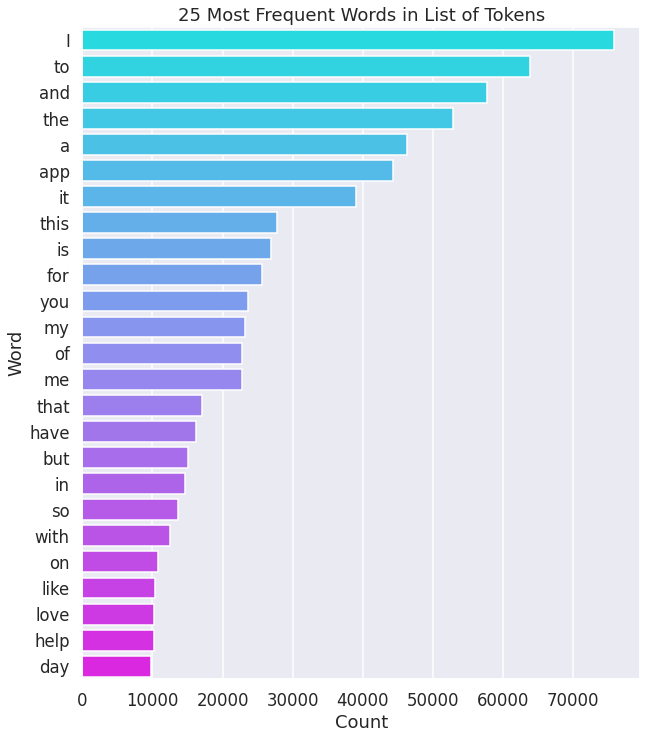

In [45]:
# Write function to create barplot of most common words
def most_freq(tokens, n=25, figsize=(12,7)):
    """
    Displays bar plot of n most frequent words in a list of tokens.

    Args:
        tokens (list) : List of string tokens to plot frequency for.
        n (int) : Number of tokens to plot.
        figsize (float, float) : Width, height in inches.

    Returns:
        
    """
    freq = FreqDist(tokens)
    
    most_frequent_tokens = pd.DataFrame(freq.most_common(n),
                           columns=['word','count']).sort_values('count', ascending=False)
    fig, ax = plt.subplots(figsize=(10,12))
    
    
    sns.barplot(data=most_frequent_tokens, y='word', x='count', palette='cool', ax=ax, orient='h')

    ax.set_title(f'{n} Most Frequent Words in List of Tokens')
    ax.set_ylabel('Word')
    ax.set_xlabel('Count')
    
    
most_freq(lemmatized_tokens)

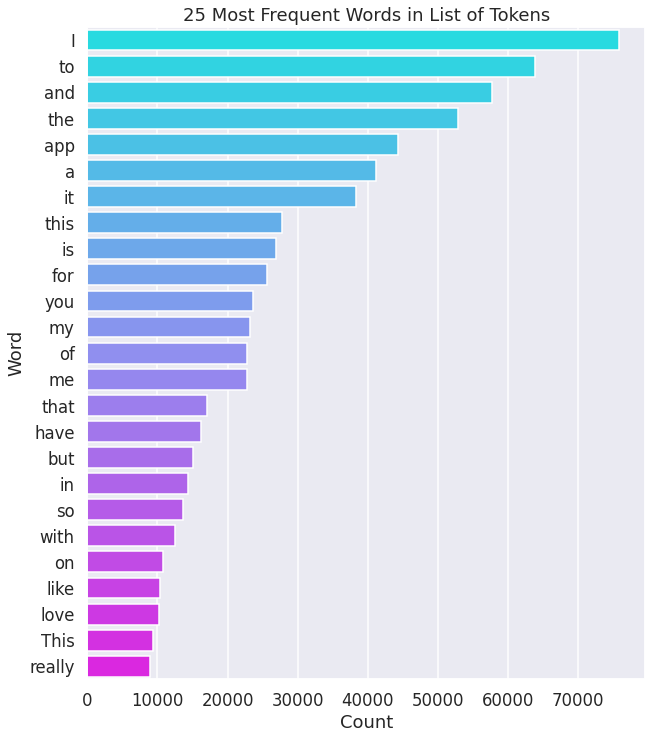

In [46]:
most_freq(tokens)

In [47]:
# Get all the stop words in the English language and preview first 10
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
stopwords_list[:25]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

In [48]:
# Add punctuation to stopwords_list
stopwords_list.extend(string.punctuation)
stopwords_list[-10:]

['[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [49]:
# Add additional punctuation below to stopwords_list
additional_punc = ['“','”','...',"''",'’','``']
stopwords_list.extend(additional_punc)

In [50]:
# Remove stopwords
stopped_tokens = [w.lower() for w in tokens  if w.lower() not in stopwords_list]
stopped_tokens[:50]

['best',
 'app',
 'far',
 'mindfulness',
 'it’s',
 'almost',
 'embarrassing',
 'say',
 'meditator',
 'years',
 'say',
 'never',
 'really',
 'got',
 'much',
 'tried',
 'hard',
 'i’m',
 'finding',
 'never',
 'truly',
 'understood',
 'trying',
 'good',
 'meditator',
 'mindful',
 'person',
 'missing',
 'i’m',
 'learning',
 'app',
 'mindfulness',
 'understanding',
 'first',
 'it’s',
 'lot',
 'acceptance',
 'understanding',
 'acceptance',
 'begin',
 'see',
 'things',
 'much',
 'clearly',
 'previous',
 'ways',
 'thinking',
 'particularly',
 'holding',
 'back']

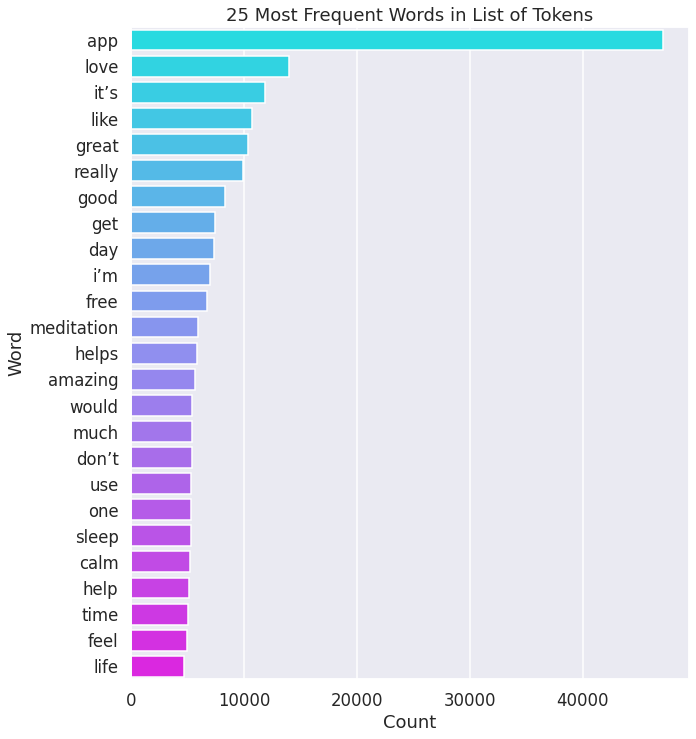

In [51]:
## Remake the FreqDist from stopped_tokens
most_freq(stopped_tokens, 25, figsize=(12,40))

In [52]:
# Add obvious indicator words to stopwords_list
stopwords_list.extend(["app","wa", "apps", "headspace", "calm", "insight", "timer", "fabulous", "reflectly"])

In [53]:
# Remove stopwords
stopped_tokens = [w.lower() for w in lemmatized_tokens  if w.lower() not in stopwords_list]
stopped_tokens[:50]

['best',
 'far',
 'mindfulness',
 'it’s',
 'almost',
 'embarrassing',
 'say',
 'meditator',
 'year',
 'say',
 'never',
 'really',
 'got',
 'much',
 'tried',
 'hard',
 'i’m',
 'finding',
 'never',
 'truly',
 'understood',
 'trying',
 'good',
 'meditator',
 'mindful',
 'person',
 'missing',
 'i’m',
 'learning',
 'mindfulness',
 'understanding',
 'first',
 'it’s',
 'lot',
 'acceptance',
 'understanding',
 'acceptance',
 'begin',
 'see',
 'thing',
 'much',
 'clearly',
 'previous',
 'way',
 'thinking',
 'particularly',
 'holding',
 'back',
 'living',
 'life']

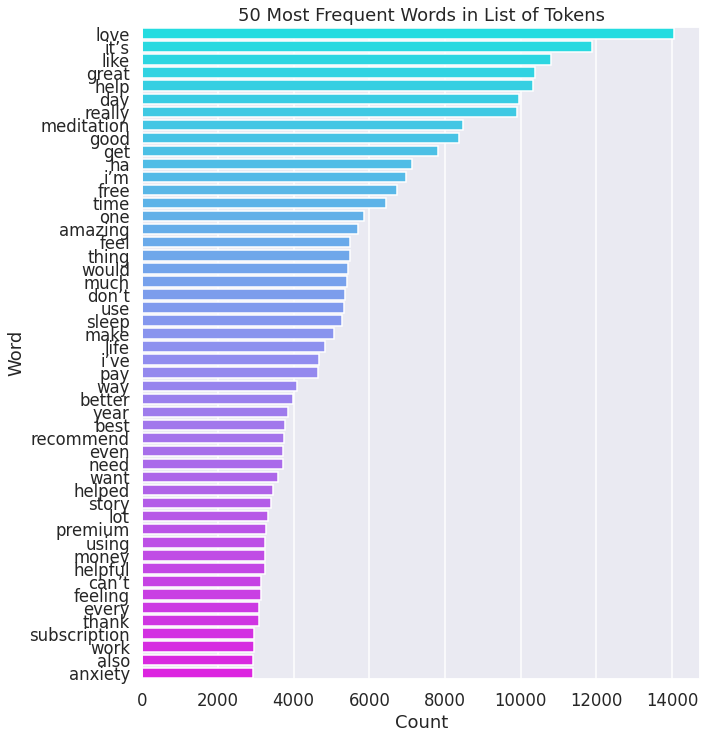

In [54]:
most_freq(stopped_tokens,50, figsize=(12,25))

In [55]:
eda_stopwords = stopwords_list.copy()
eda_stopwords.extend(["love","it's", "like", "great", "really", "good", "i'm", "amazing", "calm", "best"])

In [56]:
# Remove stopwords
stopped_tokens = [w.lower() for w in lemmatized_tokens  if w.lower() not in eda_stopwords]

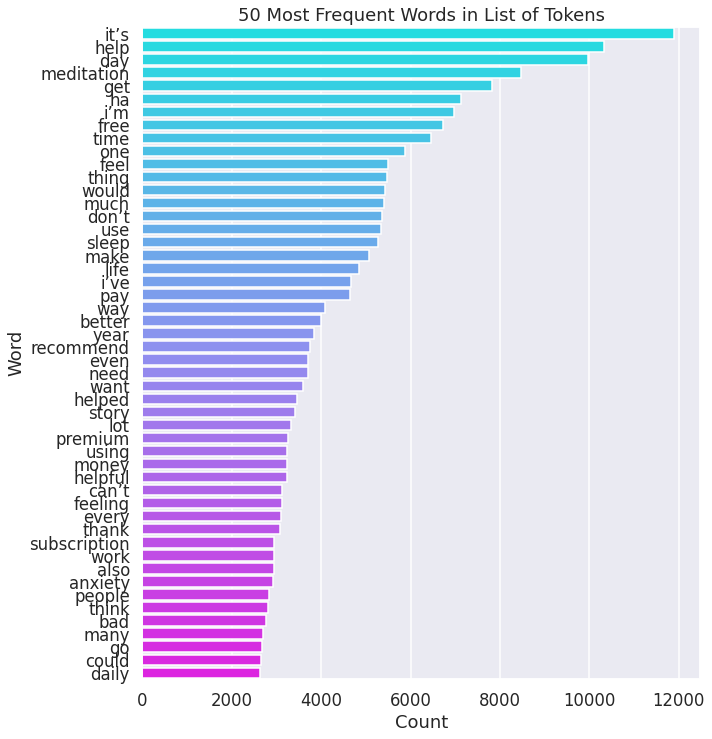

In [57]:
most_freq(stopped_tokens,50, figsize=(12,25))

In [58]:
model_stopwords = eda_stopwords.copy()
model_stopwords.extend(["good", "love", "best", "amazing", "great", "awesome",
                        "perfect", "fabulous", "wonderful", "excellent", "helps",
                        "helped", "helpful", "helping", "loving", "beautiful", 
                        "favorite", "fantastic", "calm", "good", "nice", "stupid", 
                        "annoying", "hate", "awful", "worse", "worst", "terrible",
                        "disappointed", "disappointing", "garbage", "recommend", 
                        "thanks", "thank", "horrible"])

## Bigram Exploration

In [59]:
# Remove stopwords
stopped_tokens = [w.lower() for w in lemmatized_tokens  if w.lower() not in model_stopwords]

In [60]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
bigram_scores = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [61]:
## Make a DataFrame from the Bigrams
pd.DataFrame(bigram_scores, columns=["Word","Freq"]).head(30)

,Word,Freq
0,"(bad, bad)",0.001722
1,"(mental, health)",0.001435
2,"(fall, asleep)",0.001250
3,"(free, trial)",0.001077
4,"(sleep, story)",0.001043
5,"(make, feel)",0.001040
6,"(every, day)",0.000922
7,"(guided, meditation)",0.000891
8,"(life, changing)",0.000685
9,"(easy, use)",0.000672


In [62]:
model_stopwords.extend(["bad"])

In [63]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

bigram_pmi_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
bigram_pmi_finder.apply_freq_filter(3)

bigram_pmi_scored = bigram_pmi_finder.score_ngrams(bigram_measures.pmi)

In [64]:
## Make a DataFrame from the Bigrams with PMI
pd.DataFrame(bigram_pmi_scored,columns=['Words','PMI']).head(50)

,Words,PMI
0,"(mumbo, jumbo)",18.060355
1,"(suze, orman)",18.060355
2,"(nick, offerman)",17.645317
3,"(ellie, goulding)",17.645317
4,"(gregg, mcbride)",17.645317
5,"(idris, elba)",17.645317
6,"(jerome, flynn)",17.645317
7,"(kabat, zinn)",17.645317
8,"(roller, coaster)",17.323389
9,"(alice, wonderland)",17.323389


## Word Cloud Visualization

(-0.5, 399.5, 199.5, -0.5)

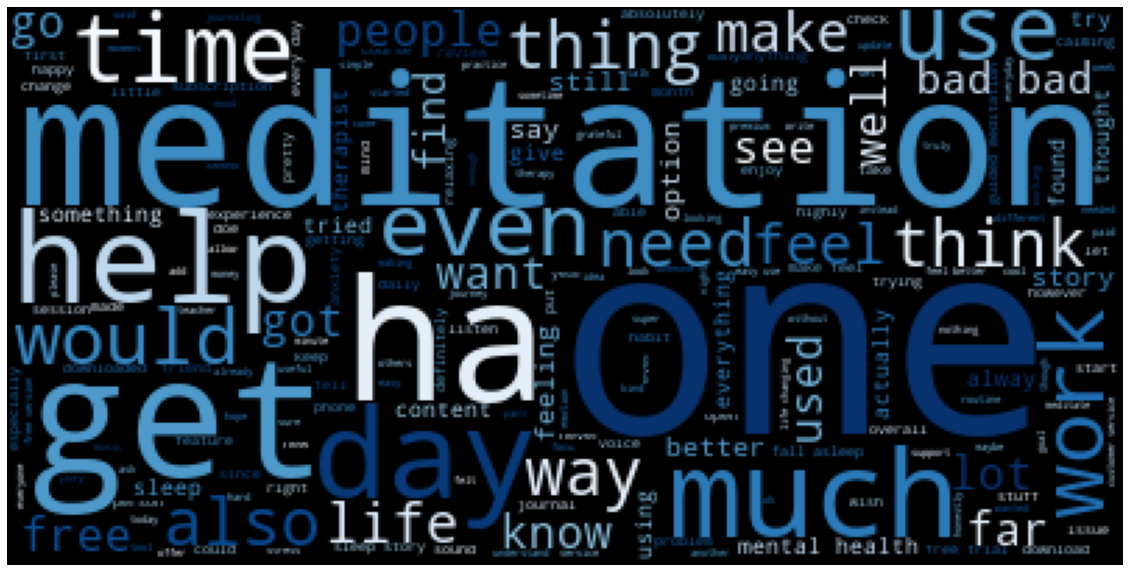

In [65]:
from wordcloud import WordCloud

## Initalize a WordCloud with our stopwords_list and no bigrams
wordcloud = WordCloud(stopwords=eda_stopwords,collocations=True, colormap='Blues', background_color="Black")

## Generate wordcloud from stopped_tokens
wordcloud.generate(','.join(stopped_tokens))

## Plot with matplotlib
plt.figure(figsize = (20, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off')

In [66]:
positive_df = clean_df[clean_df['multi_sent']==2]
neutral_df = clean_df[clean_df['multi_sent']==1]
negative_df = clean_df[clean_df['multi_sent']==0]
display(negative_df, neutral_df, positive_df)

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
52,2021-07-02 13:40:31,DWil9059230,"Meditation should transcend politics. This app has a lot of traditionally based vipassana-style meditation, which is very helpful for learning to meditate and gaining its benefits. However, the app has recently uploaded a lot of political content directly supporting movements such as Black Lives Matter and the ideology of critical race theory. It’s hard to emphasize enough how disastrous of a decision this is. It is reducing the transcendent method of meditation to a mere ideological political tool. Meditation allows you the psychological freedom to see passed concepts that you’ve established unconsciously your whole life and to use that freedom to live deliberately and compassionately with all peoples. Critical race theory attempts to add concepts such as privilege to push you to act in a particular way not necessarily aligned with your deepest intuitions and compassionate motivations. So, it’s a reduction of what the practice could be (vipassana, insight, and metta, loving-kindness) for the short-term aims of a political ideology. If you are interested in meditation and not politics, I recommend the Waking Up app, which has vipassana and meta meditations as well as dharma lectures from some eminent practitioners. Good luck on your journey!",1,0,0,0
58,2020-08-09 12:42:14,njalexsmith,"Doesn’t work well with Iwatch. I wish this app was designed to be more intuitive with the Apple Watch. I can only play a 1 minute breathing exercise on the iwatch app despite the website is conveying and customer support is poor. I sent an email to customer support. The first response from customer service is that my response will take longer than 48 hours with an apology. Second response was a name of a customer service agent and never heard back. I tried reaching out by DM on social media, but no response. Furthermore, if you use the 1 minute breathing exercise on the watch, it doesn’t sync to your account. The phone app is great, but I would like to use my phone less, not more. My phone is integrated with my work apps (email, calendar, teams, etc) and adds endless anxiety. Because the phone app is good, I wouldn’t give it just one star, however I am posting a 1 star review because both devs and customers only read 1 star reviews. Headspace has a customer service problem along with a poor iwatch app. I haven’t had an issue with the phone app.",1,0,0,0
60,2020-02-17 08:00:14,Carpeltunneltexting,"Cannot get a human to respond. I am super frustrated & don’t know what else to do to get a human to provide answers. I am having so many problems with the Headspace app- login issues, profile management, invited family members can’t create an account. I have tried the FAQs and online support but they don’t provide solutions. The “live chat” doesn’t exist. To unlink an account it says to contact support - who is that? I have emailed many requests but no answers. 4-6 days to respond due to high volumes. I still haven’t heard one iota of anything except that I’m in some queue. I just wanted a human to respond. Nobody has replied but yet my credit card is charged. And on our end, we can’t use the app. I realize I am just a drop in the bucket in terms of your users. But I want to cancel my account. I believe I get 30 days. But I’m afraid nobody will respond within that window and I will be stuck with a family subscription nobody can use. Please help me get out of the anxiety that trying to use app has caused. If that ain’t irony. 😂 What do I need to do to have a customer service representative contact me?",1,0,0,0
72,2020-02-28 12:07:04,jamesui111,"Great meditations but a cluttered app. A month ago I would have given headspace 5 stars, because the meditations and courses are great. Recently though they have started crowding the app with community content, suggested content, information about juice cleanses... All of which invites you to spend time on 

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
10,2021-01-15 15:44:26,zigalellium,"Great resource!. This is really helpful! The only reason I didn’t give a higher rating is because there’s a strong overlying tone of a sales pitch there. Which is unfortunate, because I think people would be able to see the value easier if there wasn’t a push for money after every meditation and for many of the things on the app people would want to explore. Kind of stalls progress of the meditation itself when you’ve just worked so hard to pull yourself back, only to be instantly asked for money right after. From a company stand point I also think it would be more beneficial to work on building value and then freely offering the option to see what monthly costs are and also show a detailed description of what’s involved with a paid membership. I know this has worked well financially for other services and I’ve seen increases in sales by simply looking at things from the customers perspective. And I feel like the customers perspective is a miss here :( However quite and easy fix and overall this app is amazing! It not only teaches the basics of meditation, but teaches different techniques as well. This makes it good for beginners all the way to experts. I truly believe that the basis of this app is pure in intention and I can see what a help it is to many people who walk the path of life.",3,1,1,0
16,2021-06-09 05:06:38,Antiduplicity,"A great app. Needs work. I give this app 5 stars because the build of this app, the contents of this app, the flow of this app is great. well done. Every app can be improved and this one needs work in some ways 1. the watch app: the only thing I every get on the watch app is a 1 minute ""breath mini"". the watch app is basically useless. Why can't I see my today screen on the watch and start my various mediations from the watch. the watch app gets 1 star. 2. Shortcuts: on the iphone I have setup a sleep schedule. On the ""good night"" screen I am given the option to run shortcuts. Headspace offers a few shortcuts that can be called from this screen. One is the nightly ""sleepcast"". the sleepcast is supposzed to be different every night. It is different on my today screen, but the shortcut always plays the ""Rainyday Antiques"". therefore the shortcut is useless. this part of the app gets 1 star. Lastly, the philosophy behind this app is mindlessness. It is taught as a universal fix for bringing the mind to a place of ease. As such it is a religious philosophy. I think they need to be more open about this and they need to state that the point of this is to alleviate suffering. This app looks like they did version 1 then stopped before finishing the details. Shortcuts must work for this app to be fully functional",3,1,1,0
23,2021-06-27 15:56:22,odd numbet,"Ok but could be better. personally, i love this app. the meditations are really helpful for my crippling anxiety, and i thoroughly enjoy watching the daily videos and doing the mindfulness moments. i also really like the new updated version with the dark mode and everything. however, i’m not as happy with headspace as i thought i would be when i got the app. i’m still a kid, and i’m not going to spend money to get headspace+, so i’ve had the normal version, however i’m very disappointed about the lack of content i have unlocked. i can only do a few meditations and they’re limited. this is very upsetting to me, and i’ve heard that others have felt the same way. i’m considering deleting headspace for exactly this reason: there’s not enough free content. soon enough i will run out of meditation sessions. i am not satisfied with this app. PLEASE unlock more content for those who don’t want or CANT spend money on headspace+!!!! you might lose this costumer to your app for just that reason. i need more content because my anxiety lately has been through the roof, so i would be excited to try out some new meditations but i CANT. please fix this!!

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
0,2021-02-22 18:13:54,Crazy Yorkie Lady,"This is the BEST app by far for mindfulness. It’s almost embarrassing to say this, but I have been a “meditator” for about 30 years and I have to say that I never really got very much out of doing it. I tried so hard, but I’m finding out I never truly understood that “trying” to be a good meditator or mindful person, was missing what doing this was about. What I’m learning through this app is that “mindfulness” is about me - understanding myself first, and it’s a lot about acceptance. So with that understanding and acceptance I can begin to see “things” so much more clearly and why previous ways of thinking, particularly about myself, were holding me back from living my life and loving myself. And I’m finding that the more I practice self acceptance, the fears about living fully and going after what I want out of my life, are disappearing. The previous version of myself is rapidly becoming someone I only used to know, and this new ME is much more in line with who I’d always wanted to be. I’m able to try and do so much more, all while in the comfort that I am lovable, even if I fail at something. I simply dust myself off and try some more. This app has completely changed me and the way I’m able to appreciate all the good that’s in my life. And I’m worthy of going after the things I want for my life, while freeing me up to share my gifts with others and society in general. If this is where you find your life stalling out, this app will bring you back to yourself.",5,2,1,1
1,2021-02-12 12:42:11,KLC-MHFL,"Facing down the rabbit hole. I discovered Headspace on Netflix. My life is a series of invitations to succumb to fear. My husband is a practicing psychologist who is on peritoneal dialysis for 10 hours every night and works remotely with patients for about 10 hours every day without complaint. We have been waiting for a kidney for two years. I am optimistic by nature but even if this was the only focus for concern it would be a lot. Unhelpfully, the list goes on with equivalent issues. I can’t work; I need to be on call because I am the go-to for support. I occupy my mind and time writing a book and renovating every room of our home one at a time amidst being available for nine blended (mostly grown) children and 5 grandkids, many of whom have special needs. I am busy but isolated like so many due to covid-19. Trying the Headspace series felt like meeting air; filling the natural and effortless need to breathe. It has provided me with a new lens through which to focus on challenges and see potential. I incorporate it into my waking routine at dawn and it positions me for whatever happens throughout the day, and differentiates a space that is my own. I turn 61 this month and for maybe the first time in a while, life feels lighter and brighter. It’s not about what you fear or can’t control or even the fact of fear. It’s about the lens through which you interpret your fears or challenges and making them your strengths and allies. Thank you Andy :-)",5,2,1,1
2,2021-02-11 06:22:38,Ashabashley,"A Bright Spot in a Dark World. You won’t regret buying a Headspace subscription. I often joke with people that Headspace is the one thing I would want to take with me to a desert island. If I were to cancel all of my subscriptions today, Headspace is the one exception I would make. I’m a high school English teacher, and our administration put together a month-long mindfulness education program for our students shortly after I subscribed. I had already raved to many of them about the app and the benefits of taking a couple of minutes out of their day to sit and be present. Lo and behold, Andy pops up on the next slide as our Ted Talk speaker of the day! On a more serious note, I suffer from debilitating chronic pain. I’m currently on long-term disability and a leave of absence from the classroom. Mindfulness, and the courses on managi

In [67]:
mask = np.array(Image.open('/content/drive/MyDrive/images/meditating_girl.png'))

In [68]:
# Write functions to use to create wordclouds

def wordcloud_prep(df_col, stopwords):
    """
    Converts a column of strings into a list of lemmatized tokens with
    a specified list of stopwords removed.

    Args:
        df_col (col) : Sliced column from dataframe with text to be put into
                       a wordcloud
        stopwords (list) : List of stopwords to remove from text.

    Returns:
        stopped_cloud (list) : List of lemmatized tokens with stopwords
                               removed.
    """
    
    cloud_corpus = df_col.to_list()
    cloud_tokens = regexp_tokenize(','.join(cloud_corpus), 
                                   r"([a-zA-Z]+(?:’[a-z]+)?)")
    lemmatized_cloud = lemmatize_tokens(cloud_tokens)
    stopped_cloud = [w.lower() for w in lemmatized_cloud  if w.lower() not in stopwords]
    return stopped_cloud


def generate_wordcloud(tokens, stopwords=None, collocations=False, 
                       background_color='black', colormap='cool',
                       mask=mask):
    """
    Creates and displays a wordcloud using the specified list of tokens,
    stopwords, and mask image.

    Args:
        tokens (list) : List of tokens to generate wordcloud from.
        stopwords (list) : List of stopwords to remove from text.
        collocations (bool) : Whether to include collocations (bigrams) of 
                              two words.
        background_color (color value) : Background color for the word cloud image.
        colormap (matplotlib colormap) : Matplotlib colormap to randomly draw 
                                         colors from for each word.
        mask (nd-array) : Gives a binary mask on where to draw words. If mask 
                          is not None, width and height will be ignored and 
                          the shape of mask will be used instead.

    Returns:
        wordcloud : Image of wordcloud generated using specified text.
    """
    
    ## Initalize a WordCloud
    wordcloud = WordCloud(stopwords = stopwords,
                          collocations=collocations, 
                          background_color=background_color, 
                          colormap=colormap,
                          mask=mask,contour_width=2, 
                          contour_color='steelblue',
                          min_font_size=15)

    ## Generate wordcloud from tokens
    wordcloud.generate(','.join(tokens))

    plt.figure(figsize = (12, 15), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis('off');
    return wordcloud

In [69]:
positive_tokens = wordcloud_prep(positive_df['combined_text'], model_stopwords)

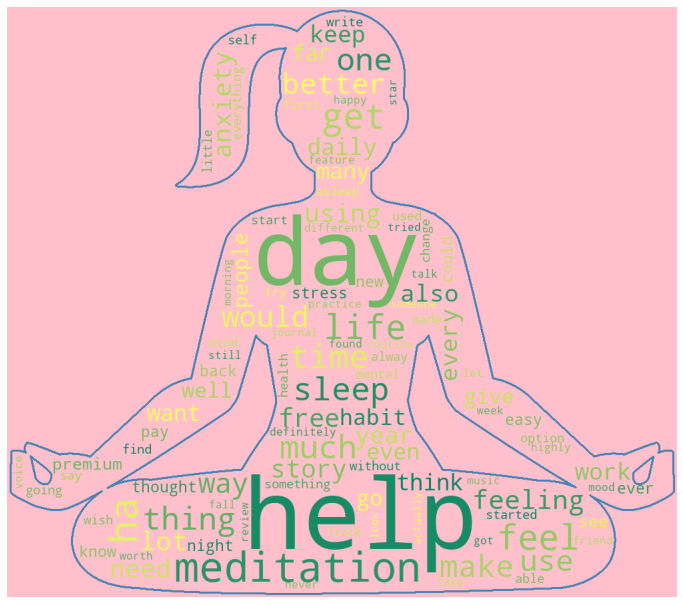

In [70]:
generate_wordcloud(positive_tokens, model_stopwords, colormap='summer', background_color='pink')

In [71]:
negative_tokens = wordcloud_prep(negative_df['combined_text'], model_stopwords)

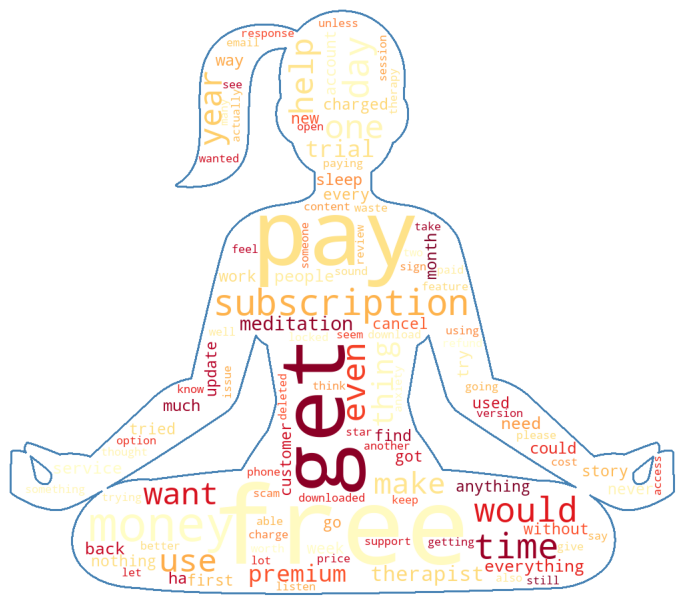

In [72]:
generate_wordcloud(negative_tokens, model_stopwords, colormap='YlOrRd', background_color='white')

In [73]:
neutral_tokens = wordcloud_prep(neutral_df['combined_text'], model_stopwords)

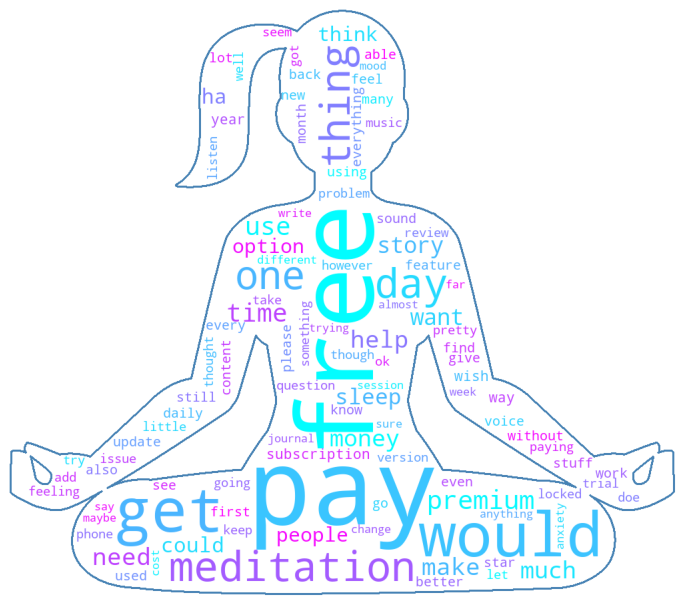

In [74]:
generate_wordcloud(neutral_tokens, model_stopwords, colormap='cool', background_color='white')

# MODEL

## Multi-Class Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [75]:
def evaluate_model(y_test, y_train, X_test, X_train, clf, n_class=3, figsize=(10,5), digits=2, params=False):
    """
    Displays evaluation metrics including classification report, confusion
    matrix, ROC-AUC curve.
    
    If the argument 'params' is passed, will display a table of the 
    parameters hyperparameters used in the model.

    Args:
        y_test (Series) : Testing data with target variable.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with vectorized feature variables.
        X_train (DataFrame) : Training data with vectorized feature variables.
        clf (classifier object) : Type of classificatier model to use.
        n_class (int) : Number of classes for classification task.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        digits (int) : Number of decimal places to display in classification
                       report
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
    
    """
    sns.set_style('dark')
    # Get Predictions
    y_hat_test = clf.predict(X_test)
    y_hat_train = clf.predict(X_train)
    
    print("****TRAIN VS TEST ACCURACY****")
    #training and test scores
    print("\n", f"Training Score: {round(clf.score(X_train, y_train),2)}", 
          "\n", f"Test Score: {round(clf.score(X_test, y_test),2)}", "\n")
    
    #Classification report
    print("****CLASSIFICATION REPORT - TEST DATA****")
    print(metrics.classification_report(y_test, y_hat_test, digits=digits))
    
    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")
    
    if n_class == 3:
        #Creating a figure/axes for confusion matrix and ROC curve
        fig, ax = plt.subplots(ncols=2, figsize=figsize)

        #Plotting the normalized confusion matrix
        plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test, cmap='Purples', 
                              normalize='true', ax=ax[0], 
                              display_labels=['Negative', 'Neutral', 'Positive'])
        ax[0].set_title('Confusion Matrix')
        

        pred_prob = clf.predict_proba(X_test)

        #Plotting the ROC curve
        fpr={}
        tpr={}
        thresh={}

        for i in range(n_class):    
            fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
            
        ax = ax[1]
        ax.grid()
        ax.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Negative')
        ax.plot(fpr[1], tpr[1], linestyle='-',color='blue', label='Neutral')
        ax.plot(fpr[2], tpr[2], linestyle='-',color='green', label='Positive')
        ax.set_title('ROC-AUC curve')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive rate')
        ax.legend(loc='best')

        #Plotting the 50-50 guessing plot for reference
        ax.plot([0,1], [0,1], ls='-', color='purple')

        plt.tight_layout()
        plt.show()

    elif n_class == 2:
        fig, axes = plt.subplots(ncols=2, 
                                 figsize=figsize)

        # Confusion Matrix
        metrics.plot_confusion_matrix(clf, X_test,
                                      y_test,normalize='true',
                                     cmap='Purples',ax=axes[0],
                                     display_labels=['Negative', 'Positive'])
        axes[0].set_title('Confusion Matrix')

        # Plot ROC Curve
        metrics.plot_roc_curve(clf,X_test,y_test,ax=axes[1])

        ax = axes[1]
        ax.plot([0,1],[0,1], ls='-', color='purple')
        ax.grid()
        ax.set_title('ROC-AUC Curve')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive rate')
        ax.get_legend().remove()

        plt.tight_layout()
        plt.show()
        
    
    

    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(clf.get_params()))
        params.columns=['parameters']
        display(params)

In [76]:
## Make X and y
y_multi = clean_df['multi_sent'].copy()
X = clean_df['combined_text'].copy()

In [77]:
# Train Test Split
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X, y_multi, test_size=0.3,
                                                    random_state=27)

In [78]:
## Check y_train value counts
y_multi_train.value_counts(normalize=True)

2    0.774930
0    0.171951
1    0.053119
Name: multi_sent, dtype: float64

In [79]:
# Initialize regexp tokenizer
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")

In [80]:
## Make a TfIdf Vectorizer using tweet tokenizer's .tokenize method
vectorizer_multi = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                             stop_words=model_stopwords,
                             ngram_range=(1,2))

# Vectorize data and make X_train_tfidf and X_test_tfidf
X_multi_train_tfidf = vectorizer_multi.fit_transform(X_multi_train)
X_multi_test_tfidf = vectorizer_multi.transform(X_multi_test)
X_multi_train_tfidf

<31288x310272 sparse matrix of type '<class 'numpy.float64'>'
	with 1030122 stored elements in Compressed Sparse Row format>

### Logistic Regression

In [81]:
logreg = LogisticRegression(max_iter=200, class_weight='balanced')
logreg.fit(X_multi_train_tfidf, y_multi_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

****TRAIN VS TEST ACCURACY****

 Training Score: 0.95 
 Test Score: 0.85 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      2347
           1       0.23      0.39      0.29       717
           2       0.96      0.89      0.92     10346

    accuracy                           0.85     13410
   macro avg       0.64      0.69      0.66     13410
weighted avg       0.88      0.85      0.86     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


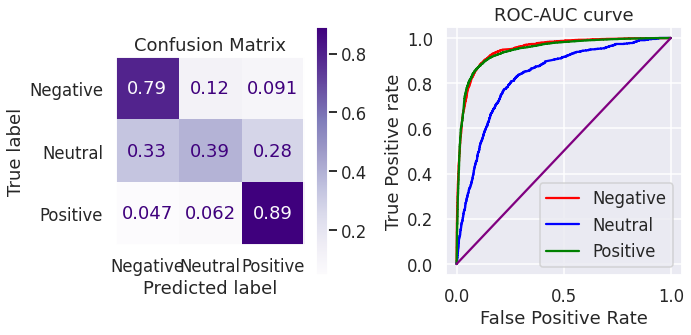

In [82]:
evaluate_model(y_multi_test, y_multi_train, X_multi_test_tfidf, X_multi_train_tfidf, logreg)

### Random Forest

In [83]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_multi_train_tfidf, y_multi_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

****TRAIN VS TEST ACCURACY****

 Training Score: 1.0 
 Test Score: 0.84 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.87      0.44      0.58      2347
           1       0.50      0.00      0.01       717
           2       0.84      0.99      0.91     10346

    accuracy                           0.84     13410
   macro avg       0.74      0.48      0.50     13410
weighted avg       0.83      0.84      0.80     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


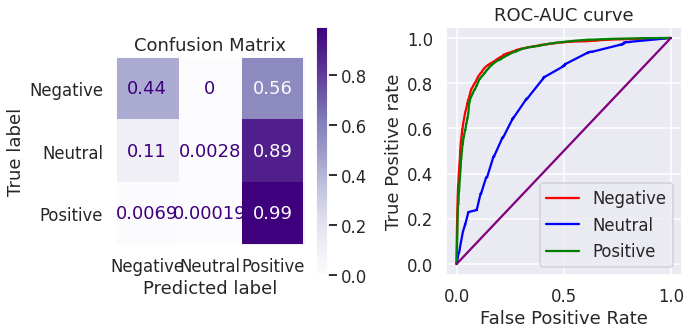

In [84]:
evaluate_model(y_multi_test, y_multi_train, X_multi_test_tfidf, X_multi_train_tfidf, rf)

In [85]:
rf = RandomForestClassifier(class_weight='balanced')

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 40],
              'n_estimators': [50, 100, 200],
              'min_samples_leaf': [2, 5, 10]}

gridsearch = GridSearchCV(estimator=rf, param_grid = param_grid, scoring='f1_macro', n_jobs=-1)

gridsearch.fit(X_multi_train_tfidf,  y_multi_train)
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_leaf': 2,
 'n_estimators': 200}

****TRAIN VS TEST ACCURACY****

 Training Score: 0.86 
 Test Score: 0.84 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.71      0.66      0.68      2347
           1       0.23      0.26      0.24       717
           2       0.91      0.92      0.91     10346

    accuracy                           0.84     13410
   macro avg       0.62      0.61      0.61     13410
weighted avg       0.84      0.84      0.84     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


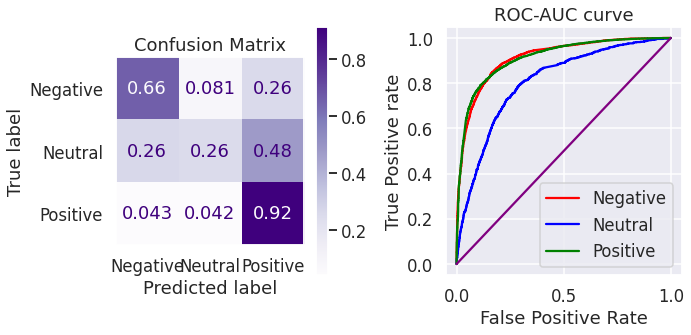

In [86]:
evaluate_model(y_multi_test, y_multi_train, X_multi_test_tfidf, X_multi_train_tfidf, gridsearch.best_estimator_)

In [87]:
rf = RandomForestClassifier(class_weight='balanced')

param_grid = {'criterion': ['entropy'],
              'max_depth': [40, 60],
              'n_estimators': [200, 300],
              'min_samples_leaf': [5]}

gridsearch = GridSearchCV(estimator=rf, param_grid = param_grid, scoring='f1_macro', n_jobs=-1)

gridsearch.fit(X_multi_train_tfidf,  y_multi_train)
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 60,
 'min_samples_leaf': 5,
 'n_estimators': 300}

****TRAIN VS TEST ACCURACY****

 Training Score: 0.84 
 Test Score: 0.82 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      2347
           1       0.20      0.38      0.27       717
           2       0.92      0.89      0.90     10346

    accuracy                           0.82     13410
   macro avg       0.62      0.64      0.62     13410
weighted avg       0.85      0.82      0.83     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


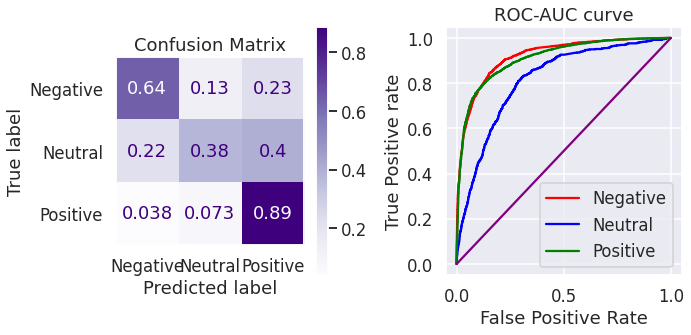

In [88]:
evaluate_model(y_multi_test, y_multi_train, X_multi_test_tfidf, X_multi_train_tfidf, gridsearch.best_estimator_)

## BINARY [1-2] Negative,  [3-5] Positive

In [89]:
# Make y
y_bin = clean_df['sent_bin_3up'].copy()

In [90]:
## Train Test Split
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X, y_bin, test_size=0.3,
                                                    random_state=27)

In [91]:
## Make a TfIdf Vectorizer using tweet tokenizer's .tokenize method
vectorizer_bin = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                             stop_words=model_stopwords,
                             ngram_range=(1,2))

# Vectorize data and make X_train_tfidf and X_test_tfidf
X_bin_train_tfidf = vectorizer_bin.fit_transform(X_bin_train)
X_bin_test_tfidf = vectorizer_bin.transform(X_bin_test)
X_bin_train_tfidf

<31288x310272 sparse matrix of type '<class 'numpy.float64'>'
	with 1030122 stored elements in Compressed Sparse Row format>

### Logistic Regression

In [92]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_bin_train_tfidf, y_bin_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

****TRAIN VS TEST ACCURACY****

 Training Score: 0.94 
 Test Score: 0.9 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.67      0.87      0.75      2347
           1       0.97      0.91      0.94     11063

    accuracy                           0.90     13410
   macro avg       0.82      0.89      0.85     13410
weighted avg       0.92      0.90      0.91     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


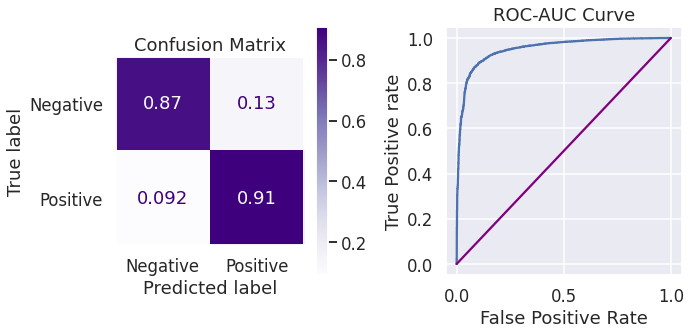

In [93]:
evaluate_model(y_bin_test, y_bin_train, X_bin_test_tfidf, X_bin_train_tfidf, logreg, 2)

### Random Forest

In [94]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_bin_train_tfidf, y_bin_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

****TRAIN VS TEST ACCURACY****

 Training Score: 1.0 
 Test Score: 0.89 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.88      0.41      0.56      2347
           1       0.89      0.99      0.94     11063

    accuracy                           0.89     13410
   macro avg       0.89      0.70      0.75     13410
weighted avg       0.89      0.89      0.87     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


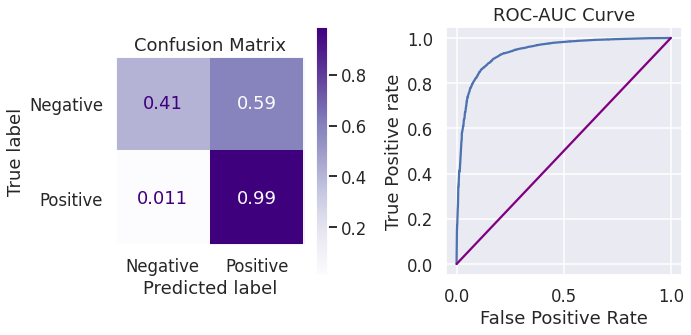

In [95]:
evaluate_model(y_bin_test, y_bin_train, X_bin_test_tfidf, X_bin_train_tfidf, rf, 2)

In [96]:
rf = RandomForestClassifier(class_weight='balanced')

param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [10, 20, 30, 40],
              'min_samples_leaf': [3, 5, 7]}

gridsearch = GridSearchCV(estimator=rf, param_grid = param_grid, scoring='f1_macro', n_jobs=-1)

gridsearch.fit(X_bin_train_tfidf,  y_bin_train)
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 3}

****TRAIN VS TEST ACCURACY****

 Training Score: 0.89 
 Test Score: 0.88 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      2347
           1       0.94      0.92      0.93     11063

    accuracy                           0.88     13410
   macro avg       0.80      0.81      0.80     13410
weighted avg       0.89      0.88      0.89     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


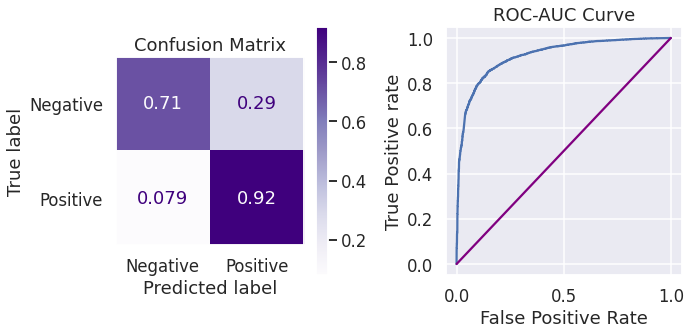

In [97]:
evaluate_model(y_bin_test, y_bin_train, X_bin_test_tfidf, X_bin_train_tfidf, gridsearch.best_estimator_, 2)

In [98]:
rf = RandomForestClassifier(class_weight='balanced')

param_grid = {'criterion': ['entropy'], 
              'max_depth': [40, 50, 60],
              'min_samples_leaf': [1, 2, 3]}

gridsearch = GridSearchCV(estimator=rf, param_grid = param_grid, scoring='f1_macro', n_jobs=-1)

gridsearch.fit(X_bin_train_tfidf,  y_bin_train)
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1}

****TRAIN VS TEST ACCURACY****

 Training Score: 0.95 
 Test Score: 0.9 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      2347
           1       0.92      0.96      0.94     11063

    accuracy                           0.90     13410
   macro avg       0.84      0.80      0.82     13410
weighted avg       0.90      0.90      0.90     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


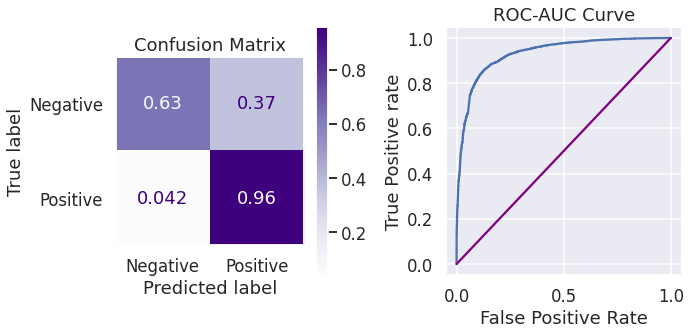

In [99]:
evaluate_model(y_bin_test, y_bin_train, X_bin_test_tfidf, X_bin_train_tfidf, gridsearch.best_estimator_, 2)

### Support Vector Classification

In [100]:
svc = LinearSVC()
svc.fit(X_bin_train_tfidf, y_bin_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

****TRAIN VS TEST ACCURACY****

 Training Score: 1.0 
 Test Score: 0.92 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2347
           1       0.95      0.96      0.95     11063

    accuracy                           0.92     13410
   macro avg       0.87      0.85      0.86     13410
weighted avg       0.92      0.92      0.92     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


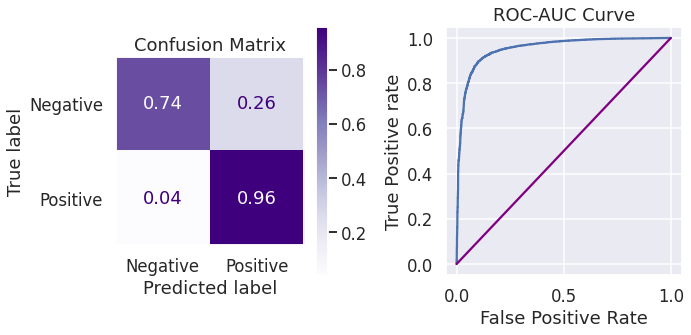

In [101]:
evaluate_model(y_bin_test, y_bin_train, X_bin_test_tfidf, X_bin_train_tfidf, svc, 2)

In [102]:
svc = LinearSVC(class_weight='balanced')

param_grid = {'penalty': ['l1', 'l2'],
              'loss': ['hinge', 'squared_hinge'],
              'tol': [0.000001, 0.0001, 0.01],
              'C': [0.1, 1, 10], 
              'fit_intercept': [True, False]}

gridsearch = GridSearchCV(estimator=svc, param_grid = param_grid, scoring='f1_macro', n_jobs=-1)

gridsearch.fit(X_bin_train_tfidf,  y_bin_train)
gridsearch.best_params_

{'C': 1, 'fit_intercept': True, 'loss': 'hinge', 'penalty': 'l2', 'tol': 1e-06}

****TRAIN VS TEST ACCURACY****

 Training Score: 0.98 
 Test Score: 0.91 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      2347
           1       0.96      0.93      0.95     11063

    accuracy                           0.91     13410
   macro avg       0.84      0.88      0.86     13410
weighted avg       0.92      0.91      0.92     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


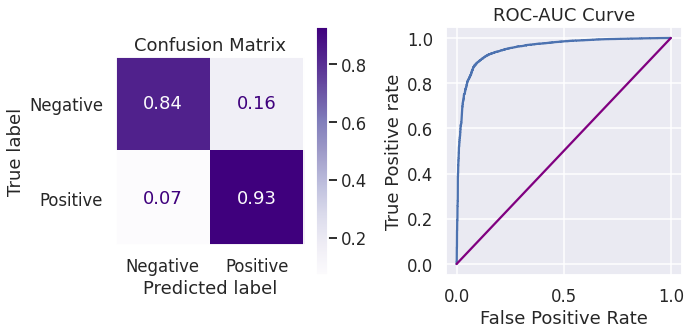

In [103]:
evaluate_model(y_bin_test, y_bin_train, X_bin_test_tfidf, X_bin_train_tfidf, gridsearch.best_estimator_, 2)

### Best Model Summary

****TRAIN VS TEST ACCURACY****

 Training Score: 0.95 
 Test Score: 0.85 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      2347
           1       0.23      0.39      0.29       717
           2       0.96      0.89      0.92     10346

    accuracy                           0.85     13410
   macro avg       0.64      0.69      0.66     13410
weighted avg       0.88      0.85      0.86     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


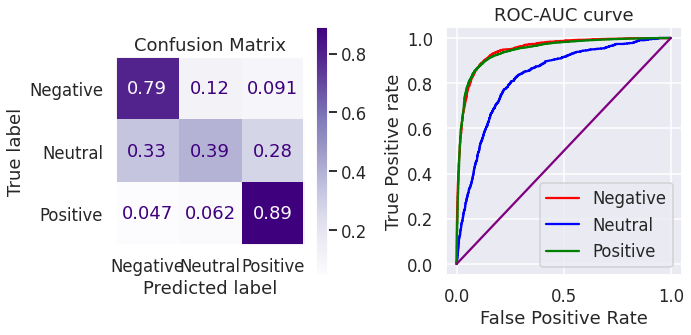

In [104]:
best_multi_lr = LogisticRegression(max_iter=200, class_weight='balanced')
best_multi_lr.fit(X_multi_train_tfidf, y_multi_train)
evaluate_model(y_multi_test, y_multi_train, X_multi_test_tfidf, X_multi_train_tfidf, best_multi_lr)

****TRAIN VS TEST ACCURACY****

 Training Score: 0.84 
 Test Score: 0.82 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      2347
           1       0.20      0.38      0.26       717
           2       0.92      0.89      0.90     10346

    accuracy                           0.82     13410
   macro avg       0.62      0.63      0.62     13410
weighted avg       0.85      0.82      0.83     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


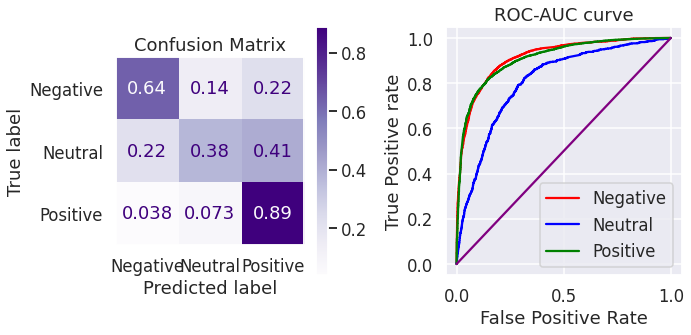

In [105]:
best_multi_rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=60, min_samples_leaf=5, n_estimators=200)
best_multi_rf.fit(X_multi_train_tfidf, y_multi_train)
evaluate_model(y_multi_test, y_multi_train, X_multi_test_tfidf, X_multi_train_tfidf, best_multi_rf)

****TRAIN VS TEST ACCURACY****

 Training Score: 0.94 
 Test Score: 0.9 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.67      0.87      0.75      2347
           1       0.97      0.91      0.94     11063

    accuracy                           0.90     13410
   macro avg       0.82      0.89      0.85     13410
weighted avg       0.92      0.90      0.91     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


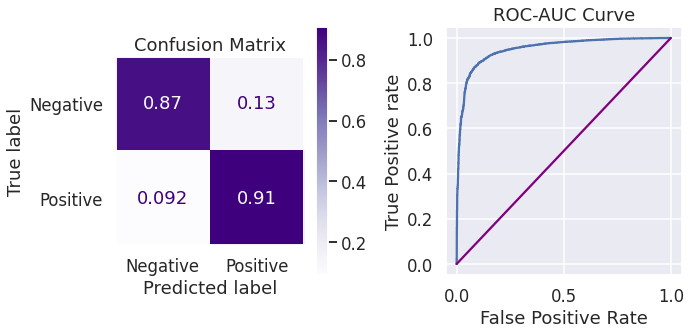

In [106]:
best_bin_lr = LogisticRegression(class_weight='balanced')
best_bin_lr.fit(X_bin_train_tfidf, y_bin_train)
evaluate_model(y_bin_test, y_bin_train, X_bin_test_tfidf, X_bin_train_tfidf, best_bin_lr, 2)

****TRAIN VS TEST ACCURACY****

 Training Score: 1.0 
 Test Score: 0.92 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2347
           1       0.96      0.94      0.95     11063

    accuracy                           0.92     13410
   macro avg       0.85      0.88      0.86     13410
weighted avg       0.92      0.92      0.92     13410

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


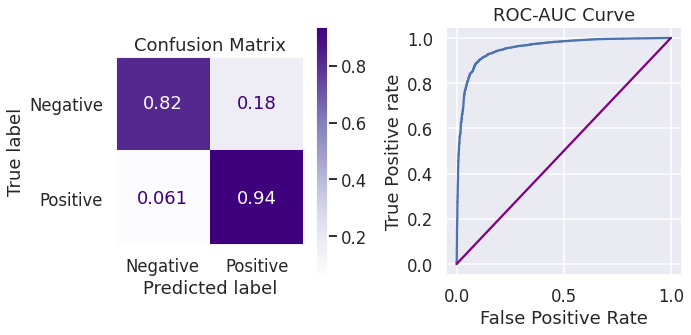

In [107]:
best_bin_svc = LinearSVC(class_weight='balanced')
best_bin_svc.fit(X_bin_train_tfidf, y_bin_train)
evaluate_model(y_bin_test, y_bin_train, X_bin_test_tfidf, X_bin_train_tfidf, best_bin_svc, 2)

# iNTERPRET

Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

In [108]:
# Extract coefficients from log_grid.best_estimator_ model.
feature_names_multi = vectorizer_multi.get_feature_names()
log_coeff_multi = pd.Series(best_multi_lr.coef_[0], index=feature_names_multi).sort_values(ascending=False)
lr_multi_neg = log_coeff_multi.head(30)
lr_multi_neg = np.exp(lr_multi_neg)
lr_multi_neg

waste           63.498956
pay             50.953571
scam            49.944215
refund          42.633903
nothing         36.227566
money           28.785997
useless         28.775571
cancel          27.746609
charged         26.375126
free            25.196707
paid            23.689521
youtube         21.334774
deleted         21.319898
even            19.307232
anything        18.904679
response        18.333621
charge          17.321513
service         16.615311
trial           15.794831
can’t           12.896201
used            11.444710
unless          11.079039
downloaded      10.762092
waste time      10.638417
subscription    10.637619
another         10.410568
account          9.501785
support          8.743360
ridiculous       8.486711
tried            8.228014
dtype: float64

In [109]:
# Extract coefficients from log_grid.best_estimator_ model.
log_coeff_multi = pd.Series(best_multi_lr.coef_[1], index=feature_names_multi).sort_values(ascending=False)
lr_multi_neut = log_coeff_multi.head(30)
lr_multi_neut = np.exp(lr_multi_neut)
lr_multi_neut

wish             27.299297
however          26.989443
needs            23.476074
okay             13.732610
pay              12.716075
locked           12.147383
update           12.025941
things           11.959397
it’s ok          10.482428
doesn’t           9.612694
notifications     9.374614
ok                9.127468
please            9.070014
premium           8.732470
three stars       8.696721
meh               8.509098
three             8.508891
could better      8.240416
though            8.039547
alright           7.791343
sometimes         7.475235
it’s calming      7.448195
mostly            7.278117
think             7.099010
rest              7.059551
distracting       6.985487
joann             6.831208
ss                6.831208
fatima            6.718651
coaching          6.633310
dtype: float64

In [110]:
# Extract coefficients from log_grid.best_estimator_ model.
log_coeff_multi = pd.Series(best_multi_lr.coef_[2], index=feature_names_multi).sort_values(ascending=False)
lr_multi_pos = log_coeff_multi.head(30)
lr_multi_pos = np.exp(lr_multi_pos)
lr_multi_pos

life          96.126438
easy          23.020718
highly        22.932870
day           14.614177
mind          12.326244
feel          10.227206
definitely     9.952203
lot            8.957751
far            8.957716
didn’t pay     8.455325
ever           7.770042
truly          7.685528
grateful       7.586002
absolutely     6.881994
anxiety        6.739409
feelings       6.530678
friend         6.317216
meditation     6.157881
everyday       6.019798
i’ve           6.000070
practice       5.770720
feeling        5.629158
asleep         5.622634
happy          5.469623
gives          5.378968
night          5.202763
fun            5.050236
diary          4.990391
positive       4.810160
relaxed        4.765493
dtype: float64

In [111]:
# Extract coefficients from log_grid.best_estimator_ model.
rf_coeff_multi = pd.Series(best_multi_rf.feature_importances_, index=feature_names_multi).sort_values(ascending=False)
rf_multi_important = rf_coeff_multi.head(30)
rf_multi_important

pay             0.021937
money           0.015715
don’t           0.009803
subscription    0.008914
would           0.007862
service         0.007685
charged         0.006942
cancel          0.006823
free            0.006746
response        0.006731
scam            0.006491
account         0.006455
refund          0.006194
everything      0.005937
can’t           0.005910
doesn’t         0.005891
free trial      0.005825
premium         0.005823
anything        0.005818
trial           0.005808
update          0.005687
please          0.005489
ok              0.005426
nothing         0.005299
paid            0.005232
life            0.005185
year            0.005085
waste           0.004967
wish            0.004936
unless          0.004932
dtype: float64

In [112]:
# Extract coefficients from log_grid.best_estimator_ model.
feature_names_bin = vectorizer_bin.get_feature_names()
log_coeff_bin = pd.Series(best_bin_lr.coef_.flatten(), index=feature_names_bin).sort_values(ascending=False)
lr_bin_pos = log_coeff_bin.head(30)
lr_bin_pos = np.exp(lr_bin_pos)
lr_bin_pos

life          530.229801
far            88.745611
day            67.915284
feel           50.607049
wish           47.694269
easy           42.675340
feelings       36.421849
lot            31.428111
things         30.973178
highly         27.996731
definitely     27.951686
much           22.797994
emotions       20.258765
always         17.602950
think          16.169812
feeling        15.242591
cool           14.697926
don’t pay      14.606286
grateful       14.454518
habits         14.291041
meditation     13.975313
i’ve           13.480623
night          12.934043
little         12.612749
truly          12.229568
mind           12.107488
asleep         11.467563
fun            10.725248
daily          10.604025
overall        10.218037
dtype: float64

In [113]:
# Extract coefficients from log_grid.best_estimator_ model.
lr_bin_neg = log_coeff_bin.tail(30)
lr_bin_neg = np.exp(abs(lr_bin_neg)).sort_values(ascending=False)
lr_bin_neg

pay             3553.944254
money            819.846392
free             665.470870
charged          383.032888
nothing          308.621623
waste            226.219367
deleted          210.762466
cancel           183.472673
scam             161.510375
can’t            157.459336
useless          140.919057
refund           137.863546
trial            103.006463
paid             102.331274
subscription      95.943210
charge            92.443215
service           91.491946
response          83.110698
used              81.713578
anything          69.966534
locked            68.038000
account           59.585385
doesn’t           55.671757
update            54.073621
crashes           53.018832
youtube           48.563128
trying            43.173729
don’t             40.385529
therapists        40.242504
expensive         36.795137
dtype: float64

In [114]:
svc_coeff_bin = pd.Series(best_bin_svc.coef_.flatten(), index=feature_names_bin).sort_values(ascending=False)
svc_bin_pos = svc_coeff_bin.head(30)
svc_bin_pos

life              1.990510
don’t pay         1.822770
it’s it’s         1.785898
wish              1.746690
far               1.635562
money pay         1.562263
sometimes         1.495670
things            1.462454
used free         1.462324
easy              1.454708
get wrong         1.393940
although          1.353349
emotions          1.334468
one thing         1.321960
highly            1.320691
didn’t pay        1.312263
little            1.306085
always            1.290369
overall           1.289742
pay things        1.288245
truly             1.270446
definitely        1.257981
day               1.255714
grateful          1.203957
stars             1.184699
appreciate        1.174816
though            1.167266
usually           1.165060
lot               1.161951
it’s expensive    1.158825
dtype: float64

In [115]:
svc_bin_neg = svc_coeff_bin.tail(30)
svc_bin_neg = abs(svc_bin_neg).sort_values(ascending=False)
svc_bin_neg

pay                3.063291
useless            3.060900
deleted            3.014309
waste              2.873388
scam               2.822861
nothing            2.686342
charged            2.685451
refund             2.593769
youtube            2.535917
money              2.435941
charge             2.426515
response           2.323186
far better         2.301989
paid               2.279224
cancel             2.181005
smh                2.132043
free               2.130526
used               2.097356
enjoy enjoy        2.090866
ridiculous         2.085524
rip                2.066901
responses          2.064077
therapists         2.044809
crashes            2.034794
trial              2.026963
can’t              2.000581
politics           1.956981
meditation it’s    1.877522
unsubscribe        1.876976
frustrating        1.876620
dtype: float64

In [116]:
def barplot_series(series, title, xlabel, ylabel, palette='cool'):
  # Create bar plot of feature coefficients as odds.
  fig, ax = plt.subplots(figsize=(10,10))

  sns.barplot(x=series.values, y=series.index, palette=palette, ax=ax, orient='h')

  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel);

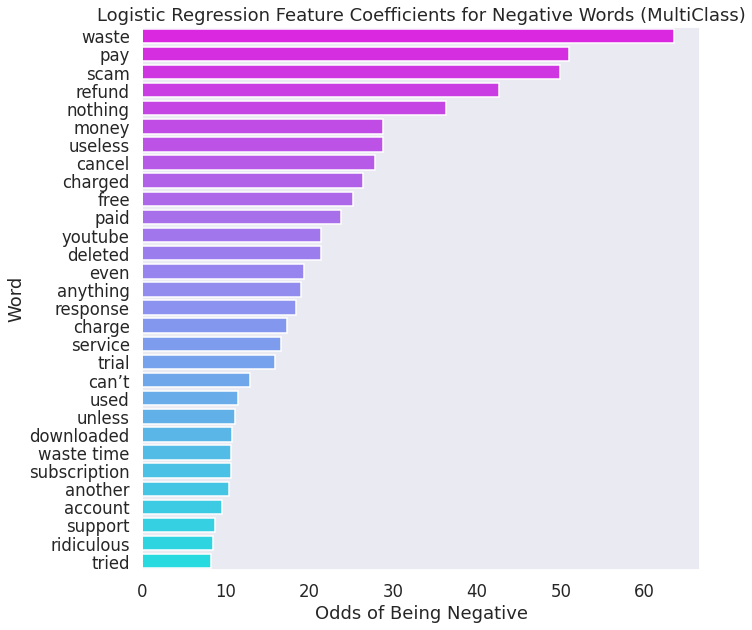

In [117]:
# Create bar plot of feature coefficients as odds.
barplot_series(lr_multi_neg, "Logistic Regression Feature Coefficients for Negative Words (MultiClass)", "Odds of Being Negative", "Word", palette='cool_r')

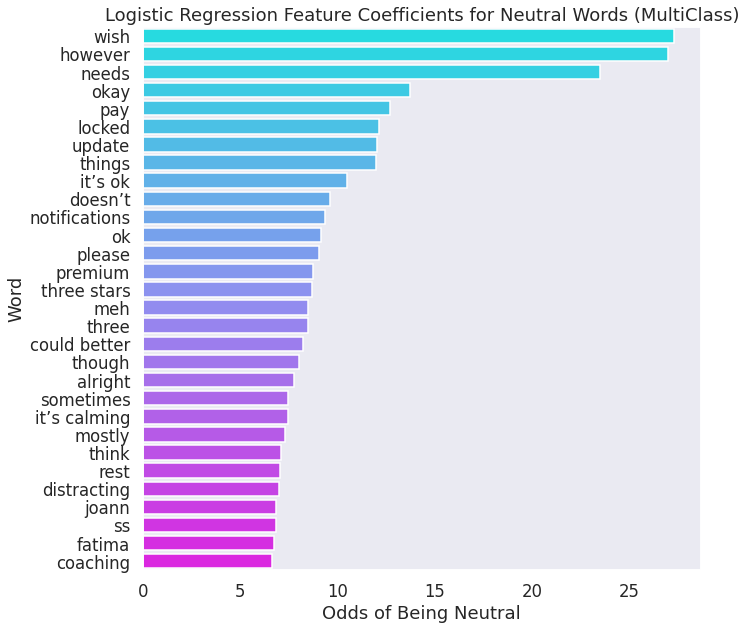

In [118]:
# Create bar plot of feature coefficients as odds.
barplot_series(lr_multi_neut, "Logistic Regression Feature Coefficients for Neutral Words (MultiClass)", "Odds of Being Neutral", "Word")

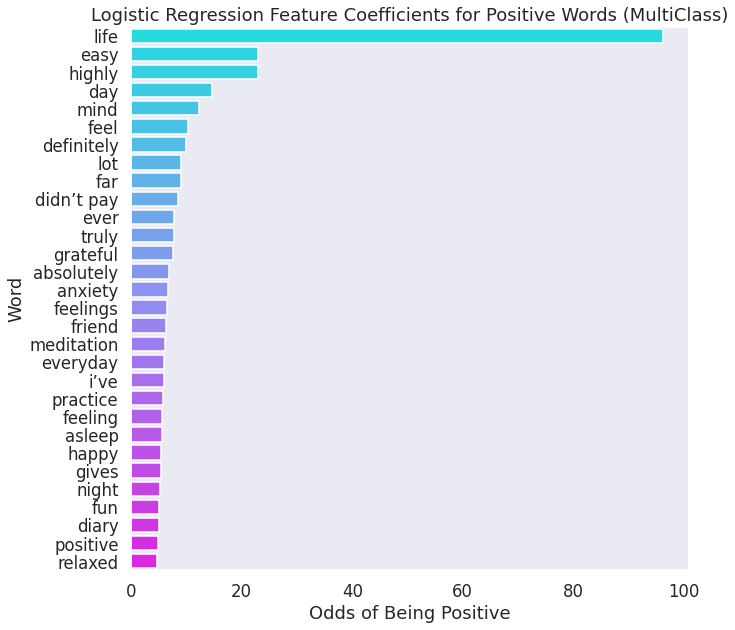

In [119]:
# Create bar plot of feature coefficients as odds.
barplot_series(lr_multi_pos, "Logistic Regression Feature Coefficients for Positive Words (MultiClass)", "Odds of Being Positive", "Word")

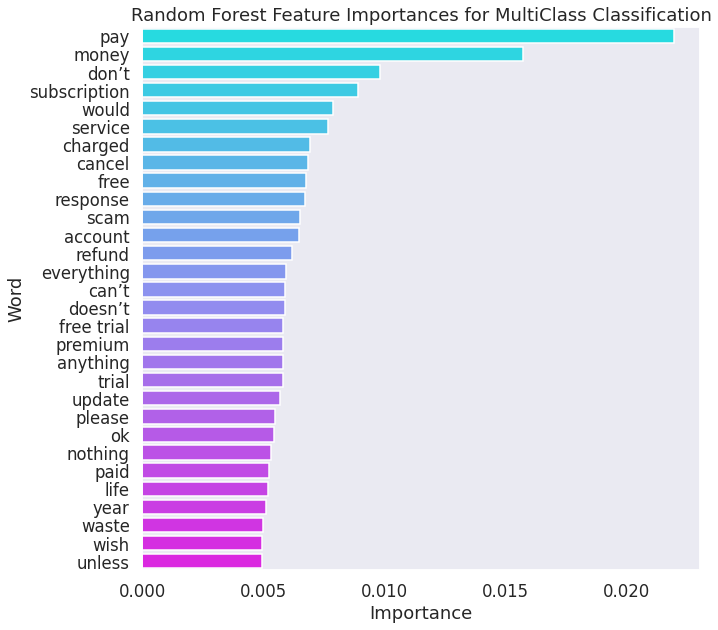

In [120]:
# Create bar plot of feature coefficients as odds.
barplot_series(rf_multi_important, "Random Forest Feature Importances for MultiClass Classification", "Importance", "Word")

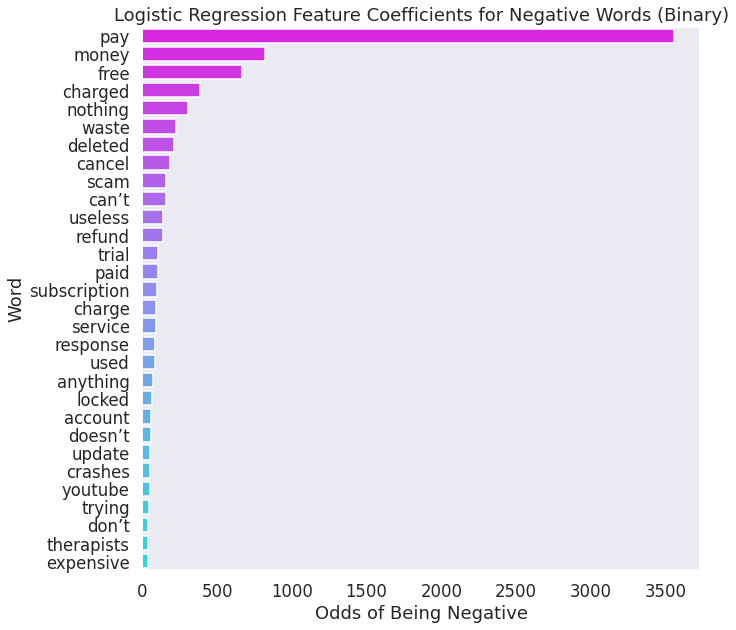

In [121]:
# Create bar plot of feature coefficients as odds.
barplot_series(lr_bin_neg, "Logistic Regression Feature Coefficients for Negative Words (Binary)", "Odds of Being Negative", "Word", 'cool_r')

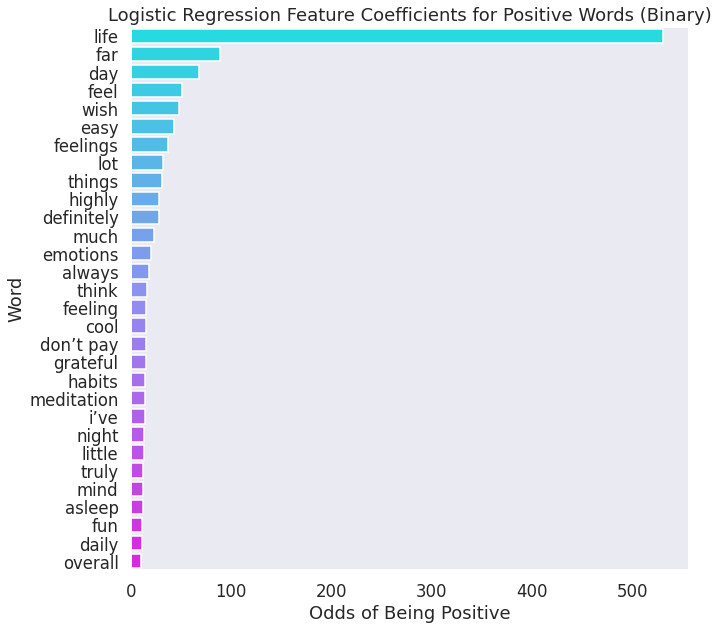

In [122]:
# Create bar plot of feature coefficients as odds.
barplot_series(lr_bin_pos, "Logistic Regression Feature Coefficients for Positive Words (Binary)", "Odds of Being Positive", "Word")

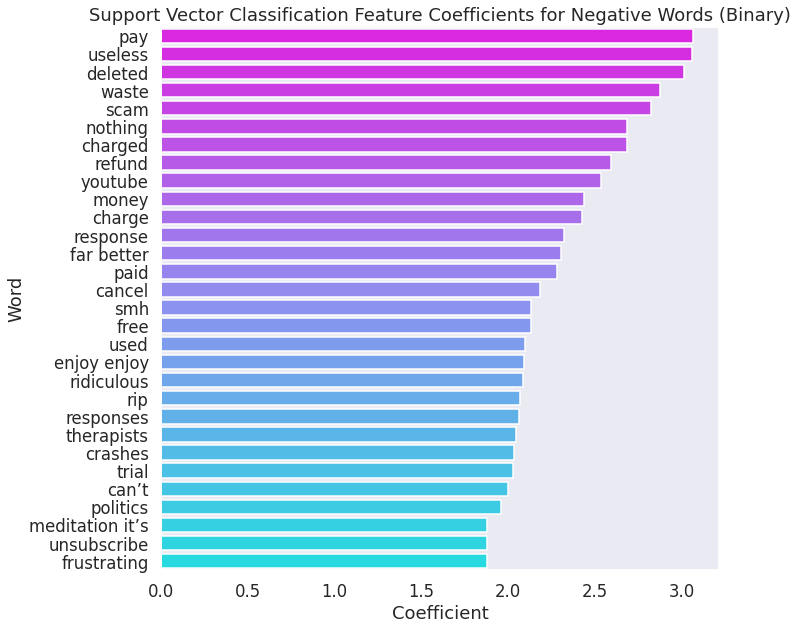

In [123]:
# Create bar plot of feature coefficients as odds.
barplot_series(svc_bin_neg, "Support Vector Classification Feature Coefficients for Negative Words (Binary)", "Coefficient", "Word", 'cool_r')

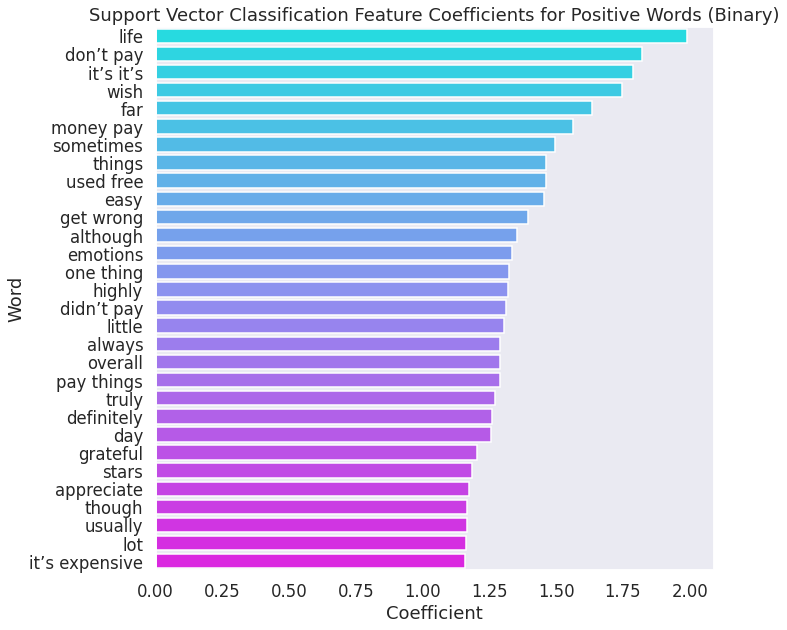

In [124]:
# Create bar plot of feature coefficients as odds.
barplot_series(svc_bin_pos, "Support Vector Classification Feature Coefficients for Positive Words (Binary)", "Coefficient", "Word")

# CONCLUSIONS & RECOMMENDATIONS

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***